Mindstorm Studios - Assignment for Product Analyst
---

By: Bilal Ahmed

--------

Overview of Data
---

In [150]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json #for parsing through JSON strings

In [151]:
# Creating dataframe from xlsx file
df = pd.read_excel('D:\Mindstorm Assignment\Pro Golf Product Analyst - Sample Data .xlsx')

# overview of the data
df.head() #getting the first 5 rows of data

Transaction Time                               User ID  \
0 2025-06-19 06:10:11.057  b199209d-b561-4e32-aa38-20ccc7e8eea0   
1 2025-06-19 06:10:02.192  b238a379-1b90-4f4e-824d-29d9bcc2da7b   
2 2025-06-19 06:08:07.636  d9611882-3cc5-4ac5-9143-253a0acabc26   
3 2025-06-19 06:07:28.251  b238a379-1b90-4f4e-824d-29d9bcc2da7b   
4 2025-06-19 06:06:02.430  d9611882-3cc5-4ac5-9143-253a0acabc26   

        Username  Purchase Order  MiniGameType MiniGameType.1      Offer ID  \
0  FlatPancakezz               8           0.0       Pro Shot  Rewarded Ads   
1      Tata15210               2           0.0       Pro Shot  Rewarded Ads   
2    Poppyitup23              42           0.0       Pro Shot  Rewarded Ads   
3      Tata15210               1           0.0       Pro Shot  Rewarded Ads   
4    Poppyitup23              41           0.0       Pro Shot  Rewarded Ads   

   Price  Display Price            Type        Offer Name  \
0    NaN            NaN  MiniGame Offer  ProShot Bundle 3   
1    NaN            NaN  MiniGame Offer  ProShot Bundle 3   
2    NaN            NaN  MiniGame Offer  ProShot Bundle 3   
3    NaN            NaN  MiniGame Offer  ProShot Bundle 3   
4    NaN            NaN  MiniGame Offer  ProShot Bundle 3   

                                          User Stats  
0  {"GIR": 40, "WinRatio": 0.37254901960784315, "...  
1  {"GIR": 33.22056833558863, "WinRatio": 0.30541...  
2  {"GIR": 30.785123966942148, "WinRatio": 0.2614...  
3  {"GIR": 33.22056833558863, "WinRatio": 0.30541...  
4  {"GIR": 30.785123966942148, "WinRatio": 0.2614...

In [152]:
df.shape

(21262, 12)

There are 21262 reccords (rows) with 12 columns

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21262 entries, 0 to 21261
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Time  21262 non-null  datetime64[ns]
 1   User ID           21262 non-null  object        
 2   Username          21262 non-null  object        
 3   Purchase Order    21262 non-null  int64         
 4   MiniGameType      20089 non-null  float64       
 5   MiniGameType.1    20089 non-null  object        
 6   Offer ID          21262 non-null  object        
 7   Price             1270 non-null   float64       
 8   Display Price     1270 non-null   float64       
 9   Type              21262 non-null  object        
 10  Offer Name        21262 non-null  object        
 11  User Stats        21262 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 1.9+ MB


The above .info function does give some idea that there are missing entries in some of the columns such as Display price and Offer Id etc. I will deal with missing values later on. As of right now, it's best if column "User Stats" which is a JSON object can be parsed out. 

The following function will help to find the structure (hierachy) of JSON strings. Just by looking at the raw data, it can be seen that it is a slightly complicated structure with nested dictionaries and multiple entries in a column. A structure would help figuring out how to make additional columns based on levels of the structure and entries in a column.

In [154]:
def explore_json_structure(data, indent=0):
    """Recursively prints the structure of JSON data with types."""
    indent_str = '  ' * indent
    if isinstance(data, dict):
        for key, value in data.items():
            value_type = type(value).__name__
            print(f"{indent_str}{key} ({value_type})")
            explore_json_structure(value, indent + 1)
    elif isinstance(data, list):
        print(f"{indent_str}- List of {len(data)} items")
        if len(data) > 0:
            # Show structure of first item in list
            explore_json_structure(data[0], indent + 1)
    else:
        print(f"{indent_str}- {data} ({type(data).__name__})")

In [155]:
# Example to see any record with User Stats. Here second record is explored.
sample_json = json.loads(df['User Stats'].iloc[1]) # any record from 0,1,,2 ... n can be explored by just simply putting the record number
explore_json_structure(sample_json)

GIR (float)
  - 33.22056833558863 (float)
WinRatio (float)
  - 0.3054101221640489 (float)
HolesStats (dict)
  Gir (float)
    - 33.22056833558863 (float)
  Rough (float)
    - 16.029228855721392 (float)
  Badges (dict)
    SpeedKing (int)
      - 859 (int)
    PuttMaster (int)
      - 40 (int)
    PerfectRound (int)
      - 331 (int)
    SharpShooter (int)
      - 248 (int)
    RecoveryMaster (int)
      - 168 (int)
  Fairway (float)
    - 71.42412935323384 (float)
  Hazards (float)
    - 12.360074626865671 (float)
  Accuracy (float)
    - 82.99322617954311 (float)
  PuttShots (int)
    - 2272 (int)
  PuttAccuracy (float)
    - 60.431338028169016 (float)
LongestChip (float)
  - 198.7487501506274 (float)
LongestPutt (float)
  - 21.444767954405872 (float)
LongestDrive (float)
  - 495.01649209051635 (float)
HoleInOneCount (int)
  - 0 (int)
TotalAttempted (int)
  - 573 (int)
TopPositionsCount (list)
  - List of 3 items
    - 46 (int)
TotalTournamentsPlayed (int)
  - 499 (int)
UsersSeasonal

Flattening out User Stats column (JSON String)

In [156]:
# Parsing 'user stats' column (JSON string to dict)
df['User Stats'] = df['User Stats'].apply(json.loads)

In [157]:
#Flattening top-level
main_stats = pd.json_normalize(
    df['User Stats'],
    sep='.',  # So nested keys become e.g., 'HolesStats.Rough'
)

In [158]:
main_stats

GIR  WinRatio  LongestChip  LongestPutt  LongestDrive  \
0      40.000000  0.372549    32.834130    15.306410    315.158108   
1      33.220568  0.305410   198.748750    21.444768    495.016492   
2      30.785124  0.261421   272.841427    14.604526    431.001471   
3      33.220568  0.305410   198.748750    21.444768    495.016492   
4      30.785124  0.261421   272.841427    14.604526    431.001471   
...          ...       ...          ...          ...           ...   
21257  30.916031  0.310680    38.337552    13.051519    417.280359   
21258  44.632768  0.350365   181.341762    19.601440    466.259551   
21259  30.303030  0.675000   151.503714     7.179263    365.629376   
21260  30.303030  0.675000   151.503714     7.179263    365.629376   
21261  31.991450  0.253372   272.984274    25.341560    493.913876   

       HoleInOneCount  TotalAttempted TopPositionsCount  \
0                   0              51         [9, 8, 2]   
1                   0             573      [46, 61, 68]   
2                   0             394      [26, 34, 43]   
3                   0             573      [46, 61, 68]   
4                   0             394      [26, 34, 43]   
...               ...             ...               ...   
21257               0             103       [11, 9, 12]   
21258               0             274      [27, 39, 30]   
21259               0              40        [10, 9, 8]   
21260               0              40        [10, 9, 8]   
21261               5            1038     [59, 87, 117]   

       TotalTournamentsPlayed GoodHolesCompletionsCount  HolesStats.Gir  \
0                          48                [20, 1, 0]       40.000000   
1                         499              [275, 31, 2]       33.220568   
2                         354               [134, 1, 0]       30.785124   
3                         499              [275, 31, 2]       33.220568   
4                         354               [134, 1, 0]       30.785124   
...                       ...                       ...             ...   
21257                      98                [30, 5, 0]       30.916031   
21258                     258              [173, 28, 1]       44.632768   
21259                      40                [11, 0, 1]       30.303030   
21260                      40                [11, 0, 1]       30.303030   
21261                    1038              [382, 17, 1]       31.991450   

       HolesStats.Rough  HolesStats.Badges.SpeedKing  \
0             19.727891                           64   
1             16.029229                          859   
2             23.412112                          505   
3             16.029229                          859   
4             23.412112                          505   
...                 ...                          ...   
21257         13.679654                          124   
21258         13.868613                          514   
21259         10.320285                           44   
21260         10.320285                           44   
21261         24.554455                         1556   

       HolesStats.Badges.PuttMaster  HolesStats.Badges.PerfectRound  \
0                                 2                              10   
1                                40                             331   
2                                36                             197   
3                                40                             331   
4                                36                             197   
...                             ...                             ...   
21257                            15                               8   
21258                            24                             217   
21259                             2                               2   
21260                             2                               2   
21261                           111                             519   

       HolesStats.Badges.SharpShoote

From the above dataframe, it can be seen that some columns such as TopPositionsCount and GoodHolesCompletionsCount have a list to them meaning multiple entries in a column. This is the case with UsersSeasonalBadgesData.Badges as well but that is a dictiionary, not a list like TopPositionsCount and GoodHolesCompletionsCount columns. I will first deal with lists.

In [159]:
# Exploding list columns into separate ones (e.g., TopPositionsCount)
if 'TopPositionsCount' in main_stats.columns:
    main_stats[['Top1st', 'Top2nd', 'Top3rd']] = pd.DataFrame(main_stats['TopPositionsCount'].tolist(), index=main_stats.index)

if 'GoodHolesCompletionsCount' in main_stats.columns:
    main_stats[['GoodHoles_Eagle', 'GoodHoles_Birdie', 'GoodHoles_Par']] = pd.DataFrame(main_stats['GoodHolesCompletionsCount'].tolist(), index=main_stats.index)

In [160]:
main_stats

GIR  WinRatio  LongestChip  LongestPutt  LongestDrive  \
0      40.000000  0.372549    32.834130    15.306410    315.158108   
1      33.220568  0.305410   198.748750    21.444768    495.016492   
2      30.785124  0.261421   272.841427    14.604526    431.001471   
3      33.220568  0.305410   198.748750    21.444768    495.016492   
4      30.785124  0.261421   272.841427    14.604526    431.001471   
...          ...       ...          ...          ...           ...   
21257  30.916031  0.310680    38.337552    13.051519    417.280359   
21258  44.632768  0.350365   181.341762    19.601440    466.259551   
21259  30.303030  0.675000   151.503714     7.179263    365.629376   
21260  30.303030  0.675000   151.503714     7.179263    365.629376   
21261  31.991450  0.253372   272.984274    25.341560    493.913876   

       HoleInOneCount  TotalAttempted TopPositionsCount  \
0                   0              51         [9, 8, 2]   
1                   0             573      [46, 61, 68]   
2                   0             394      [26, 34, 43]   
3                   0             573      [46, 61, 68]   
4                   0             394      [26, 34, 43]   
...               ...             ...               ...   
21257               0             103       [11, 9, 12]   
21258               0             274      [27, 39, 30]   
21259               0              40        [10, 9, 8]   
21260               0              40        [10, 9, 8]   
21261               5            1038     [59, 87, 117]   

       TotalTournamentsPlayed GoodHolesCompletionsCount  HolesStats.Gir  \
0                          48                [20, 1, 0]       40.000000   
1                         499              [275, 31, 2]       33.220568   
2                         354               [134, 1, 0]       30.785124   
3                         499              [275, 31, 2]       33.220568   
4                         354               [134, 1, 0]       30.785124   
...                       ...                       ...             ...   
21257                      98                [30, 5, 0]       30.916031   
21258                     258              [173, 28, 1]       44.632768   
21259                      40                [11, 0, 1]       30.303030   
21260                      40                [11, 0, 1]       30.303030   
21261                    1038              [382, 17, 1]       31.991450   

       HolesStats.Rough  HolesStats.Badges.SpeedKing  \
0             19.727891                           64   
1             16.029229                          859   
2             23.412112                          505   
3             16.029229                          859   
4             23.412112                          505   
...                 ...                          ...   
21257         13.679654                          124   
21258         13.868613                          514   
21259         10.320285                           44   
21260         10.320285                           44   
21261         24.554455                         1556   

       HolesStats.Badges.PuttMaster  HolesStats.Badges.PerfectRound  \
0                                 2                              10   
1                                40                             331   
2                                36                             197   
3                                40                             331   
4                                36                             197   
...                             ...                             ...   
21257                            15                               8   
21258                            24                             217   
21259                             2                               2   
21260                             2                               2   
21261                           111                             519   

       HolesStats.Badges.SharpShoote

In [161]:
# Processing 'UsersSeasonalBadgesData.Badges' (list of dicts) and extracting the count and badge types or seasons
def extract_badge_info(badges_list):
    if not badges_list:
        return pd.Series({'BadgeCount': 0, 'BadgeTypes': None, 'Seasons': None})
    badge_types = [badge.get('Type') for badge in badges_list]
    seasons = [badge.get('SeasonNumber') for badge in badges_list]
    return pd.Series({
        'BadgeCount': len(badges_list),
        'BadgeTypes': ','.join(map(str, badge_types)),
        'Seasons': ','.join(map(str, seasons))
    })

In [162]:
badge_info_df = main_stats['UsersSeasonalBadgesData.Badges'].apply(extract_badge_info) # storing count and badge types or seasons in badge_info_df

Dropping the previous original columns'TopPositionsCount', 'GoodHolesCompletionsCount', 'UsersSeasonalBadgesData.Badges'

In [163]:
# Dropping original columns and combine all
main_stats = main_stats.drop(columns=['TopPositionsCount', 'GoodHolesCompletionsCount', 'UsersSeasonalBadgesData.Badges'], errors='ignore')
main_stats = pd.concat([main_stats, badge_info_df], axis=1)

In [164]:
main_stats

GIR  WinRatio  LongestChip  LongestPutt  LongestDrive  \
0      40.000000  0.372549    32.834130    15.306410    315.158108   
1      33.220568  0.305410   198.748750    21.444768    495.016492   
2      30.785124  0.261421   272.841427    14.604526    431.001471   
3      33.220568  0.305410   198.748750    21.444768    495.016492   
4      30.785124  0.261421   272.841427    14.604526    431.001471   
...          ...       ...          ...          ...           ...   
21257  30.916031  0.310680    38.337552    13.051519    417.280359   
21258  44.632768  0.350365   181.341762    19.601440    466.259551   
21259  30.303030  0.675000   151.503714     7.179263    365.629376   
21260  30.303030  0.675000   151.503714     7.179263    365.629376   
21261  31.991450  0.253372   272.984274    25.341560    493.913876   

       HoleInOneCount  TotalAttempted  TotalTournamentsPlayed  HolesStats.Gir  \
0                   0              51                      48       40.000000   
1                   0             573                     499       33.220568   
2                   0             394                     354       30.785124   
3                   0             573                     499       33.220568   
4                   0             394                     354       30.785124   
...               ...             ...                     ...             ...   
21257               0             103                      98       30.916031   
21258               0             274                     258       44.632768   
21259               0              40                      40       30.303030   
21260               0              40                      40       30.303030   
21261               5            1038                    1038       31.991450   

       HolesStats.Rough  HolesStats.Badges.SpeedKing  \
0             19.727891                           64   
1             16.029229                          859   
2             23.412112                          505   
3             16.029229                          859   
4             23.412112                          505   
...                 ...                          ...   
21257         13.679654                          124   
21258         13.868613                          514   
21259         10.320285                           44   
21260         10.320285                           44   
21261         24.554455                         1556   

       HolesStats.Badges.PuttMaster  HolesStats.Badges.PerfectRound  \
0                                 2                              10   
1                                40                             331   
2                                36                             197   
3                                40                             331   
4                                36                             197   
...                             ...                             ...   
21257                            15                               8   
21258                            24                             217   
21259                             2                               2   
21260                             2                               2   
21261                           111                             519   

       HolesStats.Badges.SharpShooter  HolesStats.Badges.RecoveryMaster  \
0                                  19                                 3   
1                                 248                               168   
2                                 130                                46   
3                                 248                               168   
4                                 130                                46   
...                               ...                               ...   
21257                              43                                11   
21258                             209                               101  

Now joining the extracted data from JSON strings back to original dataframe

In [165]:
# Join expanded columns back to original DataFrame
df_final = pd.concat([df.drop(columns=['User Stats']), main_stats], axis=1)

In [166]:
# Show all columns when printing the dataframe
pd.set_option('display.max_columns', None)
df_final.head()

Transaction Time                               User ID  \
0 2025-06-19 06:10:11.057  b199209d-b561-4e32-aa38-20ccc7e8eea0   
1 2025-06-19 06:10:02.192  b238a379-1b90-4f4e-824d-29d9bcc2da7b   
2 2025-06-19 06:08:07.636  d9611882-3cc5-4ac5-9143-253a0acabc26   
3 2025-06-19 06:07:28.251  b238a379-1b90-4f4e-824d-29d9bcc2da7b   
4 2025-06-19 06:06:02.430  d9611882-3cc5-4ac5-9143-253a0acabc26   

        Username  Purchase Order  MiniGameType MiniGameType.1      Offer ID  \
0  FlatPancakezz               8           0.0       Pro Shot  Rewarded Ads   
1      Tata15210               2           0.0       Pro Shot  Rewarded Ads   
2    Poppyitup23              42           0.0       Pro Shot  Rewarded Ads   
3      Tata15210               1           0.0       Pro Shot  Rewarded Ads   
4    Poppyitup23              41           0.0       Pro Shot  Rewarded Ads   

   Price  Display Price            Type        Offer Name        GIR  \
0    NaN            NaN  MiniGame Offer  ProShot Bundle 3  40.000000   
1    NaN            NaN  MiniGame Offer  ProShot Bundle 3  33.220568   
2    NaN            NaN  MiniGame Offer  ProShot Bundle 3  30.785124   
3    NaN            NaN  MiniGame Offer  ProShot Bundle 3  33.220568   
4    NaN            NaN  MiniGame Offer  ProShot Bundle 3  30.785124   

   WinRatio  LongestChip  LongestPutt  LongestDrive  HoleInOneCount  \
0  0.372549    32.834130    15.306410    315.158108               0   
1  0.305410   198.748750    21.444768    495.016492               0   
2  0.261421   272.841427    14.604526    431.001471               0   
3  0.305410   198.748750    21.444768    495.016492               0   
4  0.261421   272.841427    14.604526    431.001471               0   

   TotalAttempted  TotalTournamentsPlayed  HolesStats.Gir  HolesStats.Rough  \
0              51                      48       40.000000         19.727891   
1             573                     499       33.220568         16.029229   
2             394                     354       30.785124         23.412112   
3             573                     499       33.220568         16.029229   
4             394                     354       30.785124         23.412112   

   HolesStats.Badges.SpeedKing  HolesStats.Badges.PuttMaster  \
0                           64                             2   
1                          859                            40   
2                          505                            36   
3                          859                            40   
4                          505                            36   

   HolesStats.Badges.PerfectRound  HolesStats.Badges.SharpShooter  \
0                              10                              19   
1                             331                             248   
2                             197                             130   
3                             331                             248   
4                             197                             130   

   HolesStats.Badges.RecoveryMaster  HolesStats.Fairway  HolesStats.Hazards  \
0                                 3           70.748299            9.523810   
1                               168           71.424129           12.360075   
2                                46          109.121123           16.691285   
3                               168           71.424129           12.360075   
4                                46          109.121123           16.691285   

   HolesStats.Accuracy  HolesStats.PuttShots  HolesStats.PuttAccuracy  Top1st  \
0            80.824428                   198                58.585859       9   
1            82.993226                  2272                60.431338      46   
2            86.484440                  1572                60.559796      26   
3            82.993226                  2272                60.431338      46   
4            86.484440                  1572                60.559796      26   

   Top2nd  Top3rd  GoodHoles_Eagle

Till now the data has been prepared for further exploration.

In [168]:
df_final.shape

(21262, 40)

As it can be seen, the dataframe has now an increased number of columns from 12 to 48 after extracting data from JSON strings.

Checking for data types of each column

In [170]:
# examining the data types
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21262 entries, 0 to 21261
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Transaction Time                  21262 non-null  datetime64[ns]
 1   User ID                           21262 non-null  object        
 2   Username                          21262 non-null  object        
 3   Purchase Order                    21262 non-null  int64         
 4   MiniGameType                      20089 non-null  float64       
 5   MiniGameType.1                    20089 non-null  object        
 6   Offer ID                          21262 non-null  object        
 7   Price                             1270 non-null   float64       
 8   Display Price                     1270 non-null   float64       
 9   Type                              21262 non-null  object        
 10  Offer Name                        21262 non-nu

Checking for duplicated rows

In [171]:
# Count of duplicated rows
print(df_final.duplicated().sum())

0


There are no duplicated rows. 

Checking for Unique Values

In [178]:
#checking the unique elements in each attribute
df_final.nunique()

Transaction Time                    21259
User ID                              2263
Username                             2263
Purchase Order                        124
MiniGameType                            2
MiniGameType.1                          2
Offer ID                               12
Price                                   6
Display Price                           8
Type                                    3
Offer Name                             13
GIR                                  1954
WinRatio                             1619
LongestChip                          2188
LongestPutt                          2263
LongestDrive                         2263
HoleInOneCount                         35
TotalAttempted                        679
TotalTournamentsPlayed                643
HolesStats.Gir                       1949
HolesStats.Rough                     2160
HolesStats.Badges.SpeedKing           852
HolesStats.Badges.PuttMaster          182
HolesStats.Badges.PerfectRound    

Checking for missing values

In [172]:
# checking for any missing values
df_final.isnull().sum()

Transaction Time                        0
User ID                                 0
Username                                0
Purchase Order                          0
MiniGameType                         1173
MiniGameType.1                       1173
Offer ID                                0
Price                               19992
Display Price                       19992
Type                                    0
Offer Name                              0
GIR                                     0
WinRatio                                0
LongestChip                             0
LongestPutt                             0
LongestDrive                            0
HoleInOneCount                          0
TotalAttempted                          0
TotalTournamentsPlayed                  0
HolesStats.Gir                          0
HolesStats.Rough                        0
HolesStats.Badges.SpeedKing             0
HolesStats.Badges.PuttMaster            0
HolesStats.Badges.PerfectRound    

Missing values in columns: MiniGameType, MiniGameType.1, Price, Display Price, BadgeTypes, Seasons.         

Treating Missing values

In [177]:
include_cols = ['MiniGameType', 'MiniGameType.1', 'Price', 'Display Price', 'BadgeTypes', 'Seasons']  # Columns I want in the loop below

for col in df_final.columns:
    if col in include_cols:
        print(f"\n--- Value counts (%): {col} ---")
        percent = df_final[col].value_counts(normalize=True, dropna=False) * 100
        print(percent.round(2).astype(str) + '%')


--- Value counts (%): MiniGameType ---
0.0    65.12%
1.0    29.36%
NaN     5.52%
Name: MiniGameType, dtype: object

--- Value counts (%): MiniGameType.1 ---
Pro Shot      65.12%
Speed Putt    29.36%
NaN            5.52%
Name: MiniGameType.1, dtype: object

--- Value counts (%): Price ---
NaN     94.03%
5.0      4.46%
15.0     0.86%
20.0     0.23%
25.0      0.2%
10.0     0.19%
50.0     0.04%
Name: Price, dtype: object

--- Value counts (%): Display Price ---
NaN      94.03%
5.00       4.0%
15.00     0.86%
0.99      0.36%
20.00     0.23%
25.00      0.2%
10.00     0.19%
2.99       0.1%
50.00     0.04%
Name: Display Price, dtype: object

--- Value counts (%): BadgeTypes ---
5                          22.69%
5,5                        15.84%
5,5,5                      14.96%
NaN                        12.59%
5,5,5,5                    10.43%
5,5,5,5,5                    7.0%
5,5,5,5,5,5                 4.95%
5,5,5,5,5,5,5,5             4.25%
5,5,5,5,5,5,5               3.29%
5,5,5,5,5,5,5,

From above, it is clearly evident that columns Price and Display Price are of no use as missing values in them are 94%. I will be dropping both of these columns. Columns MiniGameType and MiniGameType.1 will be treated in this way that missing values will get the mode of the column as this is a categorical column with one category having major contribution in both of the columns. 

In [183]:
# Filling Columns MiniGameType and MiniGameType.1 with their respective modes
df_final['MiniGameType'].fillna(df_final['MiniGameType'].mode()[0], inplace=True)
df_final['MiniGameType.1'].fillna(df_final['MiniGameType.1'].mode()[0], inplace=True)

In [184]:
include_cols = ['MiniGameType', 'MiniGameType.1']  # Columns I want in the loop below

for col in df_final.columns:
    if col in include_cols:
        print(f"\n--- Value counts (%): {col} ---")
        percent = df_final[col].value_counts(normalize=True, dropna=False) * 100
        print(percent.round(2).astype(str) + '%')


--- Value counts (%): MiniGameType ---
0.0    70.64%
1.0    29.36%
Name: MiniGameType, dtype: object

--- Value counts (%): MiniGameType.1 ---
Pro Shot      70.64%
Speed Putt    29.36%
Name: MiniGameType.1, dtype: object


Now, it can be seen clearly that there are no more any missing values in both MiniGameType and MiniGameType.1 columns.

Extracting month and year from Transaction Time column

In [186]:
# Create separate 'Month' and 'Year' columns
df_final['Month'] = df_final['Transaction Time'].dt.month
df_final['Year'] = df_final['Transaction Time'].dt.year
df_final

Transaction Time                               User ID  \
0     2025-06-19 06:10:11.057  b199209d-b561-4e32-aa38-20ccc7e8eea0   
1     2025-06-19 06:10:02.192  b238a379-1b90-4f4e-824d-29d9bcc2da7b   
2     2025-06-19 06:08:07.636  d9611882-3cc5-4ac5-9143-253a0acabc26   
3     2025-06-19 06:07:28.251  b238a379-1b90-4f4e-824d-29d9bcc2da7b   
4     2025-06-19 06:06:02.430  d9611882-3cc5-4ac5-9143-253a0acabc26   
...                       ...                                   ...   
21257 2025-05-06 03:16:00.508  c207eacb-b7a1-4bcb-aaac-e8ff40d6a919   
21258 2025-05-06 01:33:48.211  76833ed0-df11-47f1-881b-bee025fd5992   
21259 2025-05-06 01:06:30.506  5b0c2fc8-6686-4be5-9858-53b32221b43f   
21260 2025-05-06 01:04:16.766  5b0c2fc8-6686-4be5-9858-53b32221b43f   
21261 2025-05-06 00:56:02.719  ba126a41-08e0-42bf-a614-474b487ac475   

             Username  Purchase Order  MiniGameType MiniGameType.1  \
0       FlatPancakezz               8           0.0       Pro Shot   
1           Tata15210               2           0.0       Pro Shot   
2         Poppyitup23              42           0.0       Pro Shot   
3           Tata15210               1           0.0       Pro Shot   
4         Poppyitup23              41           0.0       Pro Shot   
...               ...             ...           ...            ...   
21257    Brian morris               1           0.0       Pro Shot   
21258  Boss Albatross               1           0.0       Pro Shot   
21259      SenpaiKyla               2           0.0       Pro Shot   
21260      SenpaiKyla               1           0.0       Pro Shot   
21261       MamaMoses               7           0.0       Pro Shot   

                                   Offer ID  Price  Display Price  \
0                              Rewarded Ads    NaN            NaN   
1                              Rewarded Ads    NaN            NaN   
2                              Rewarded Ads    NaN            NaN   
3                              Rewarded Ads    NaN            NaN   
4                              Rewarded Ads    NaN            NaN   
...                                     ...    ...            ...   
21257  d7d9ca5a-a544-4c53-af51-a4aa4ed60454    5.0            5.0   
21258  d7d9ca5a-a544-4c53-af51-a4aa4ed60454    5.0            5.0   
21259  4928d791-bd01-480c-8002-e8c67ea7bbf6   15.0           15.0   
21260  2328009d-ec16-454c-a318-dbfd66bb9446    5.0            5.0   
21261  2328009d-ec16-454c-a318-dbfd66bb9446    5.0            5.0   

                 Type        Offer Name        GIR  WinRatio  LongestChip  \
0      MiniGame Offer  ProShot Bundle 3  40.000000  0.372549    32.834130   
1      MiniGame Offer  ProShot Bundle 3  33.220568  0.305410   198.748750   
2      MiniGame Offer  ProShot Bundle 3  30.785124  0.261421   272.841427   
3      MiniGame Offer  ProShot Bundle 3  33.220568  0.305410   198.748750   
4      MiniGame Offer  ProShot Bundle 3  30.785124  0.261421   272.841427   
...               ...               ...        ...       ...          ...   
21257    Starter Pack          Pro Deal  30.916031  0.310680    38.337552   
21258    Starter Pack          Pro Deal  44.632768  0.350365   181.341762   
21259    Wallet Offer   Wallet Bundle 2  30.303030  0.675000   151.503714   
21260    Wallet Offer   Wallet Bundle 1  30.303030  0.675000   151.503714   
21261    Wallet Offer   Wallet Bundle 1  31.991450  0.253372   272.984274   

       LongestPutt  LongestDrive  HoleInOneCount  TotalAttempted  \
0        15.306410    315.158108               0              51   
1        21.444768    495.016492               0             573   
2        14.604526    431.001471               0             394   
3        21.444768    495.016492               0             573   
4        14.604526    431.001471               0             394   
...            ...           ...             ...             ...   
21257    13.051519    417.280359               0             103   
21258    19.601440   

Dropping all the unnecessary columns

In [187]:
df_final = df_final.drop(columns=['Transaction Time','User ID','Username','Price','Display Price'])
df_final.head()

Purchase Order  MiniGameType MiniGameType.1      Offer ID            Type  \
0               8           0.0       Pro Shot  Rewarded Ads  MiniGame Offer   
1               2           0.0       Pro Shot  Rewarded Ads  MiniGame Offer   
2              42           0.0       Pro Shot  Rewarded Ads  MiniGame Offer   
3               1           0.0       Pro Shot  Rewarded Ads  MiniGame Offer   
4              41           0.0       Pro Shot  Rewarded Ads  MiniGame Offer   

         Offer Name        GIR  WinRatio  LongestChip  LongestPutt  \
0  ProShot Bundle 3  40.000000  0.372549    32.834130    15.306410   
1  ProShot Bundle 3  33.220568  0.305410   198.748750    21.444768   
2  ProShot Bundle 3  30.785124  0.261421   272.841427    14.604526   
3  ProShot Bundle 3  33.220568  0.305410   198.748750    21.444768   
4  ProShot Bundle 3  30.785124  0.261421   272.841427    14.604526   

   LongestDrive  HoleInOneCount  TotalAttempted  TotalTournamentsPlayed  \
0    315.158108               0              51                      48   
1    495.016492               0             573                     499   
2    431.001471               0             394                     354   
3    495.016492               0             573                     499   
4    431.001471               0             394                     354   

   HolesStats.Gir  HolesStats.Rough  HolesStats.Badges.SpeedKing  \
0       40.000000         19.727891                           64   
1       33.220568         16.029229                          859   
2       30.785124         23.412112                          505   
3       33.220568         16.029229                          859   
4       30.785124         23.412112                          505   

   HolesStats.Badges.PuttMaster  HolesStats.Badges.PerfectRound  \
0                             2                              10   
1                            40                             331   
2                            36                             197   
3                            40                             331   
4                            36                             197   

   HolesStats.Badges.SharpShooter  HolesStats.Badges.RecoveryMaster  \
0                              19                                 3   
1                             248                               168   
2                             130                                46   
3                             248                               168   
4                             130                                46   

   HolesStats.Fairway  HolesStats.Hazards  HolesStats.Accuracy  \
0           70.748299            9.523810            80.824428   
1           71.424129           12.360075            82.993226   
2          109.121123           16.691285            86.484440   
3           71.424129           12.360075            82.993226   
4          109.121123           16.691285            86.484440   

   HolesStats.PuttShots  HolesStats.PuttAccuracy  Top1st  Top2nd  Top3rd  \
0                   198                58.585859       9       8       2   
1                  2272                60.431338      46      61      68   
2                  1572                60.559796      26      34      43   
3                  2272                60.431338      46      61      68   
4                  1572                60.559796      26      34      43   

   GoodHoles_Eagle  GoodHoles_Birdie  GoodHoles_Par  BadgeCount  \
0               20                 1              0         0.0   
1              275                31              2         7.0   
2              134                 1              0         8.0   
3              275                31              2         7.0   
4              134                 1              0         8.0   

        BadgeTypes             Seasons  Month  Year  
0              NaN                 NaN      6  2025  
1    5,5,5,5,5,5,5     11,10,9,8,7,6,5      6 

In [193]:
df_final.describe()

Purchase Order  MiniGameType           GIR      WinRatio   LongestChip  \
count    21262.000000  21262.000000  21262.000000  21262.000000  21262.000000   
mean        10.875976      0.293622     39.154297      0.324989    149.107522   
std         14.170626      0.455432     12.927417      0.127121     88.227630   
min          1.000000      0.000000      0.000000      0.006667      0.000000   
25%          3.000000      0.000000     29.681979      0.251656     78.179719   
50%          6.000000      0.000000     39.074355      0.318627    141.068945   
75%         14.000000      1.000000     48.337826      0.403478    222.865571   
max        289.000000      1.000000    100.000000      1.000000    430.260156   

        LongestPutt  LongestDrive  HoleInOneCount  TotalAttempted  \
count  21262.000000  21262.000000    21262.000000    21262.000000   
mean      20.406764    431.036005        2.544116      446.749177   
std        8.899093     78.999401        6.318298      692.762151   
min        1.546126    245.180226        0.000000        2.000000   
25%       14.989695    380.973881        0.000000       98.000000   
50%       19.560332    424.860484        1.000000      218.000000   
75%       23.593001    468.359190        2.000000      500.000000   
max       69.748644    879.072988       68.000000     5462.000000   

       TotalTournamentsPlayed  HolesStats.Gir  HolesStats.Rough  \
count            21262.000000    21262.000000      21262.000000   
mean               416.494591       39.154300         17.292195   
std                666.586105       12.928737          5.229693   
min                  2.000000        0.000000          0.000000   
25%                 89.000000       29.681979         13.289760   
50%                196.000000       39.074355         16.717141   
75%                446.750000       48.337826         21.084365   
max               5091.000000      100.000000         37.198068   

       HolesStats.Badges.SpeedKing  HolesStats.Badges.PuttMaster  \
count                 21262.000000                  21262.000000   
mean                    799.637946                     49.205343   
std                    1445.737736                     90.391048   
min                       0.000000                      0.000000   
25%                     130.000000                      8.000000   
50%                     334.000000                     21.000000   
75%                     859.000000                     52.000000   
max                   10865.000000                    876.000000   

       HolesStats.Badges.PerfectRound  HolesStats.Badges.SharpShooter  \
count                    21262.000000                    21262.000000   
mean                       317.777255                      351.287461   
std                        680.461854                      713.651715   
min                          0.000000                        0.000000   
25%                         18.000000                       46.000000   
50%                         85.000000                      126.000000   
75%                        316.000000                      333.000000   
max                       6552.000000                     7250.000000   

       HolesStats.Badges.RecoveryMaster  HolesStats.Fairway  \
count                      21262.000000        21262.000000   
mean                         113.136864           79.336058   
std                          247.118781           22.501343   
min                            0.000000           29.090909   
25%                           12.000000           64.467800   
50%                           36.000000           74.898785   
75%                          102.000000          100.151429   
max                         1981.000000          138.157895   

       HolesStats.Hazards  HolesStats.Accuracy  HolesStats.PuttShots  \
count        21262.000000         21262.000000          21262.000000   
mean            10.050483            86.671962           1517.677029

Outliers Detection

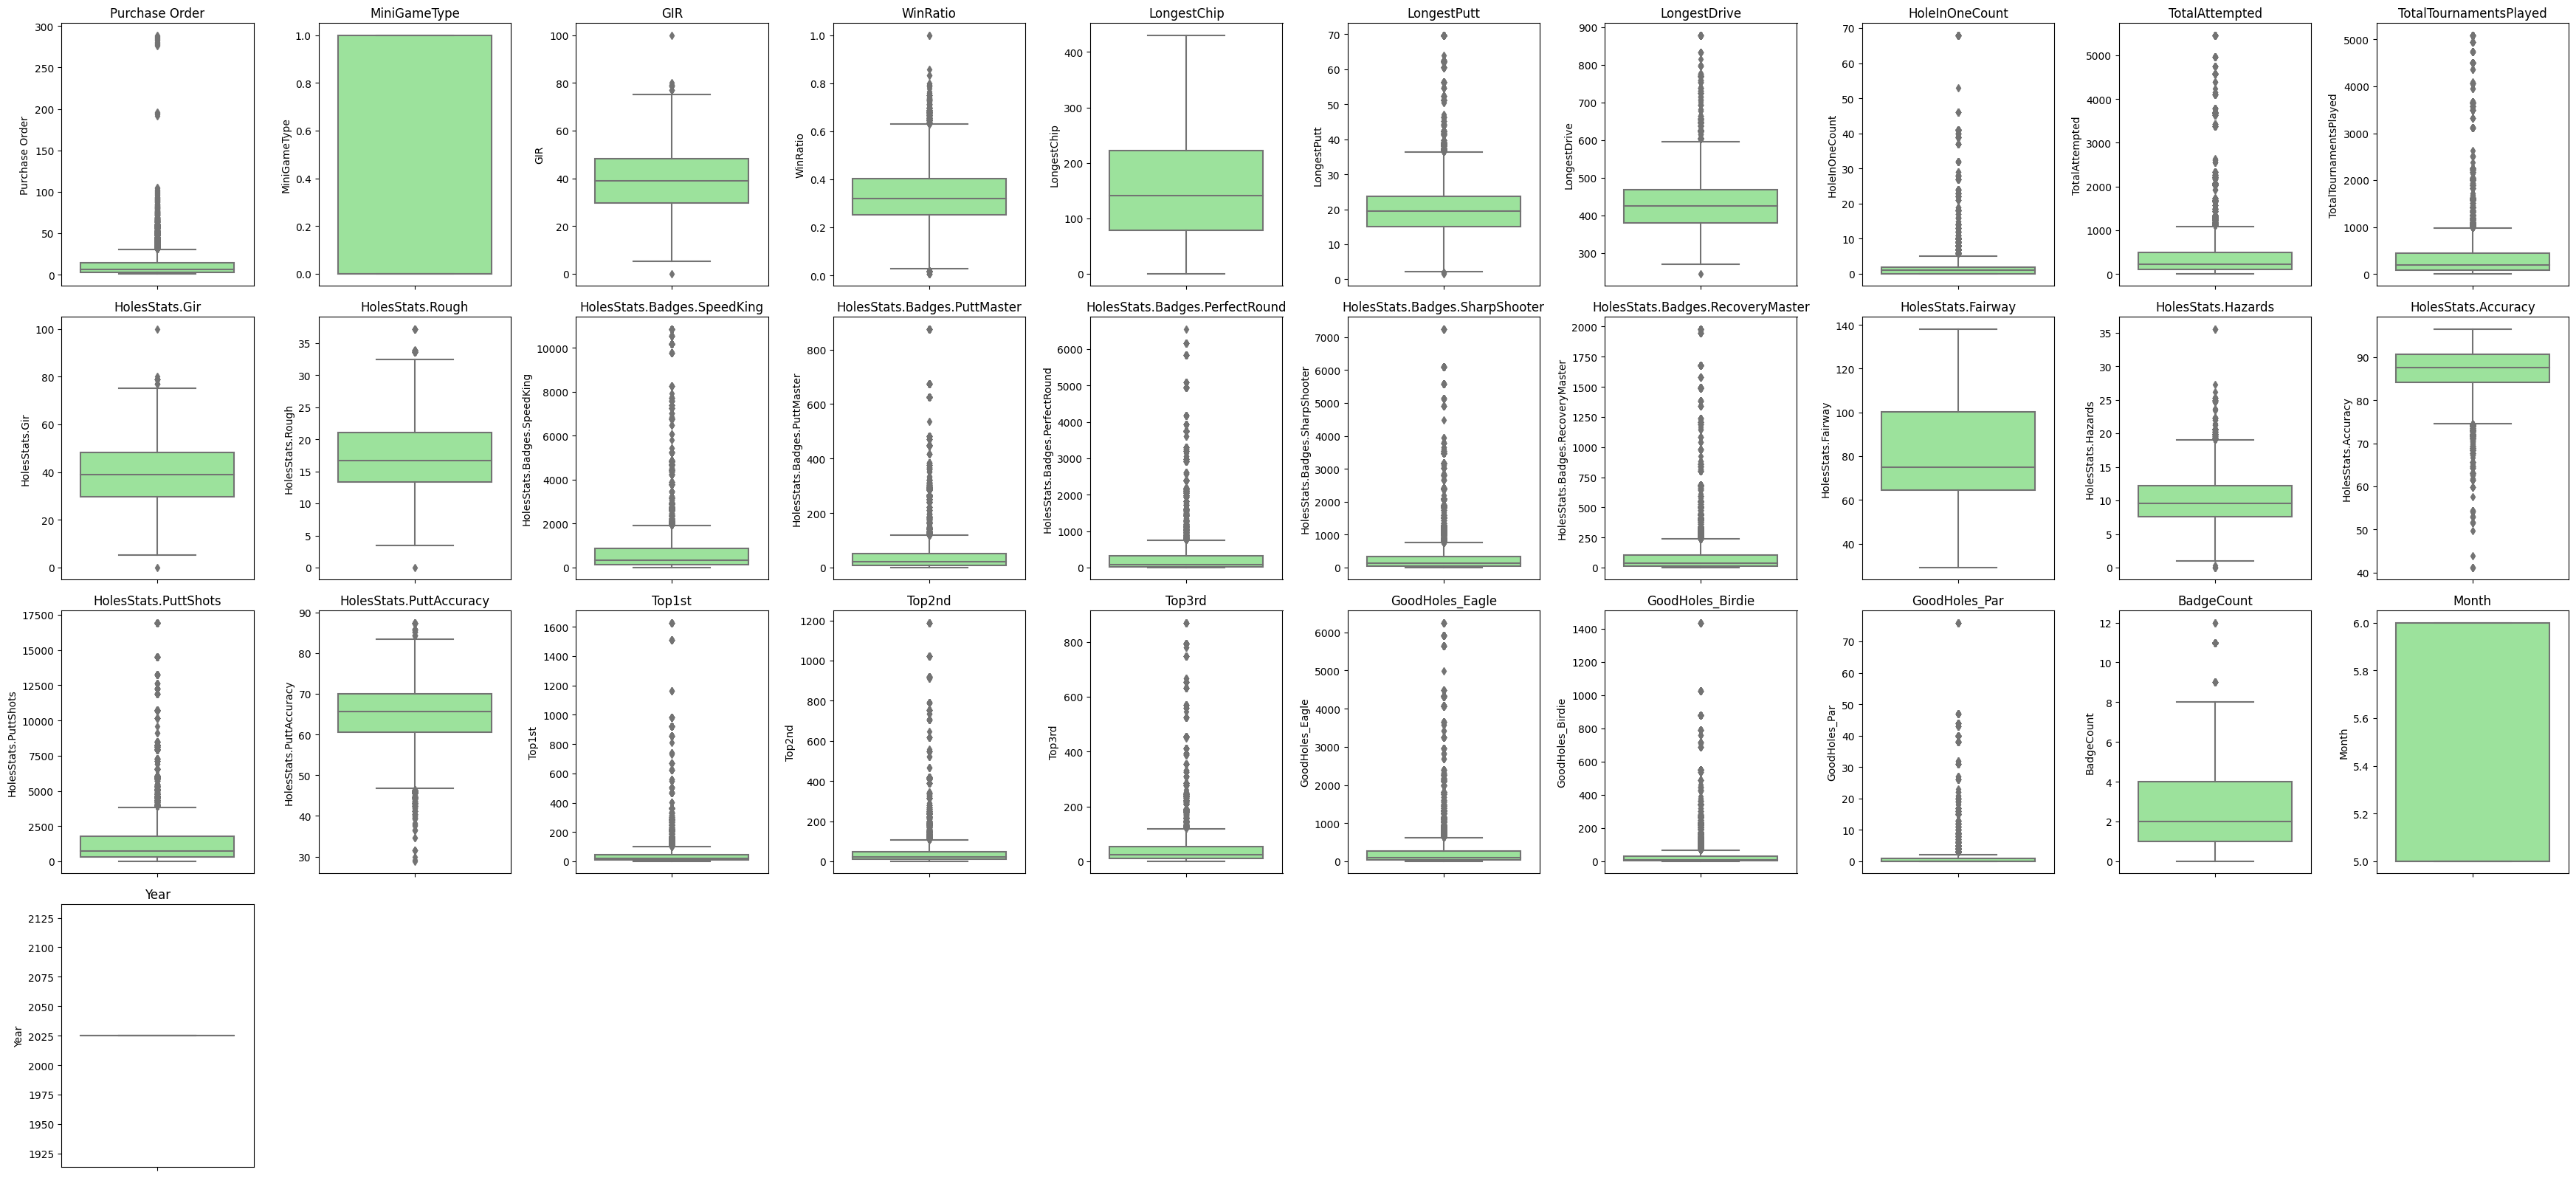

In [192]:
numerical_cols = df_final.select_dtypes(include=['number'])
plt.figure(figsize=(35, 20))
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(5, 10, i + 1)
    sns.boxplot(y=df_final[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

I am retaining every outlier even if it exists as no outlier seems illogical. 

Data Distribution
---

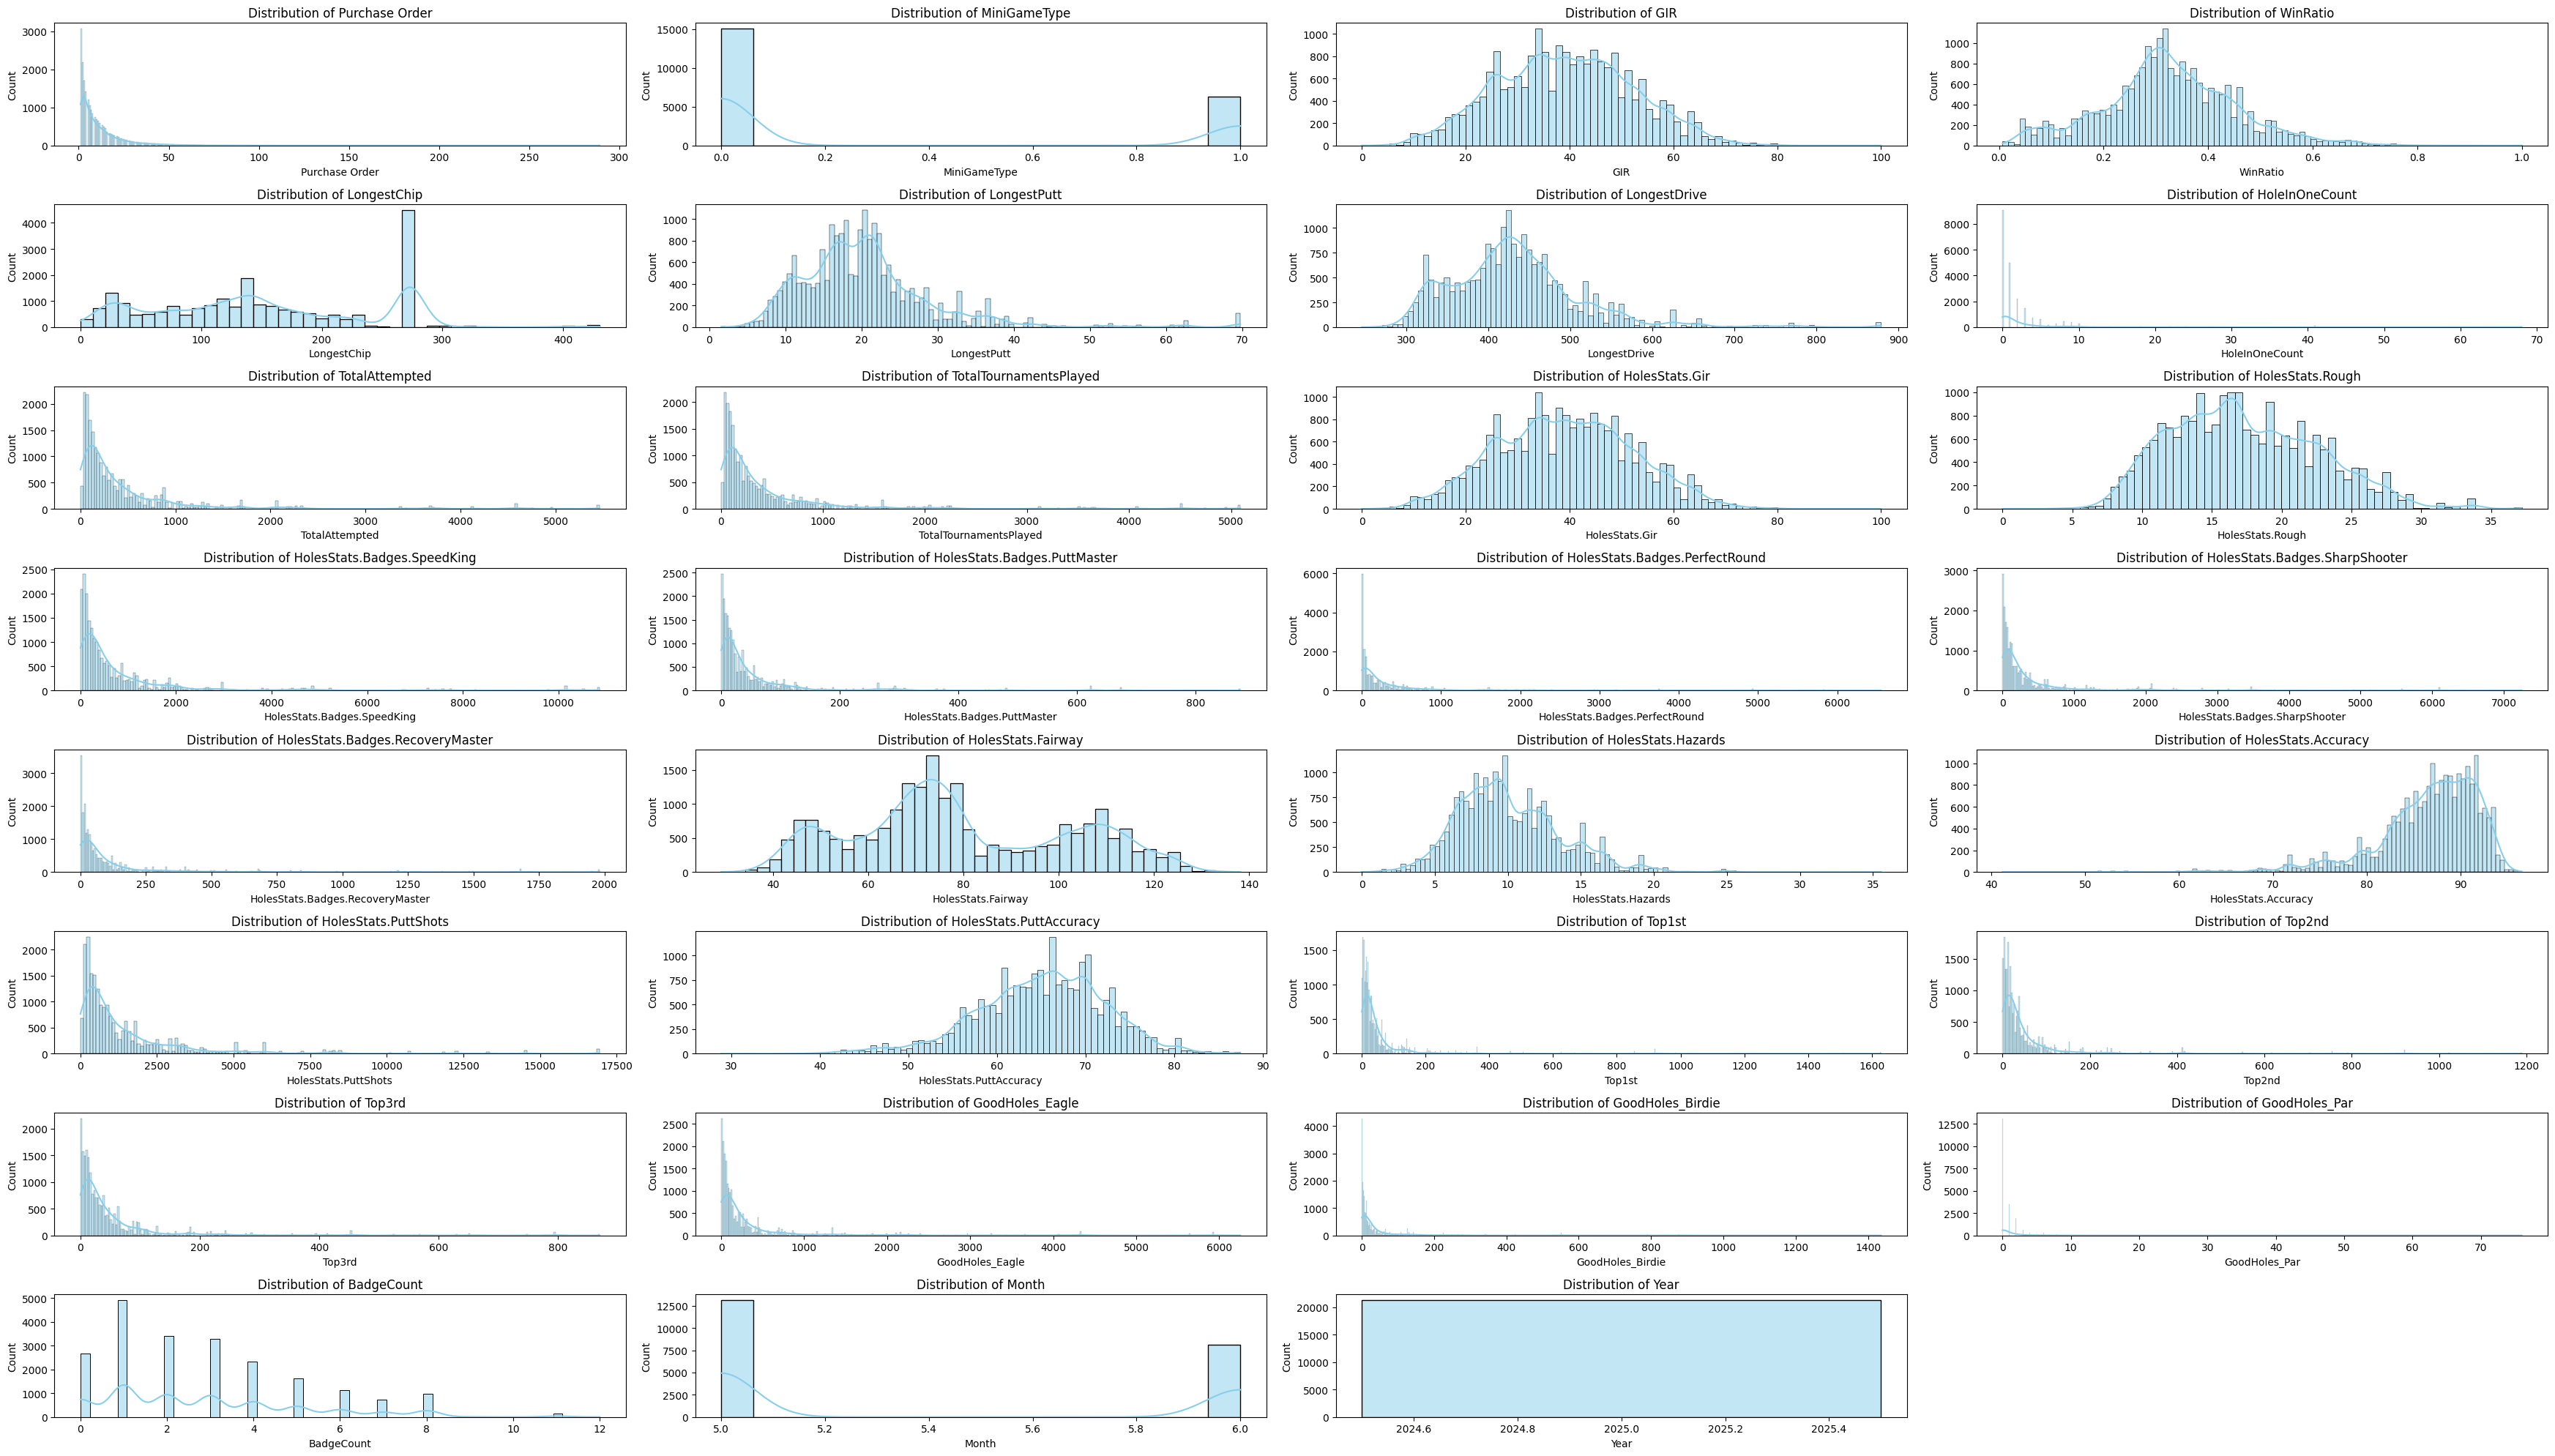

In [ ]:
#Data Distribution Visualizations of Numerical columns
numerical_cols = df_final.select_dtypes(include=['number']).columns
plt.figure(figsize=(35, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(8, 4, i + 1)
    sns.histplot(df_final[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

1. Purchase Order is left skewed meaning most of the purchase orders lies under 50 instances.
2. Most of the users have played Mini Game Type 0.0 (70.64%) as compared to Mini Game Type 1.0 (29.36%)
3. Most users have atleast Badge 1.
4. The data is of months May and June with much activity in May.
5. The data is of year 2025.


Value Counts for MiniGameType.1:
Pro Shot      15019
Speed Putt     6243
Name: MiniGameType.1, dtype: int64


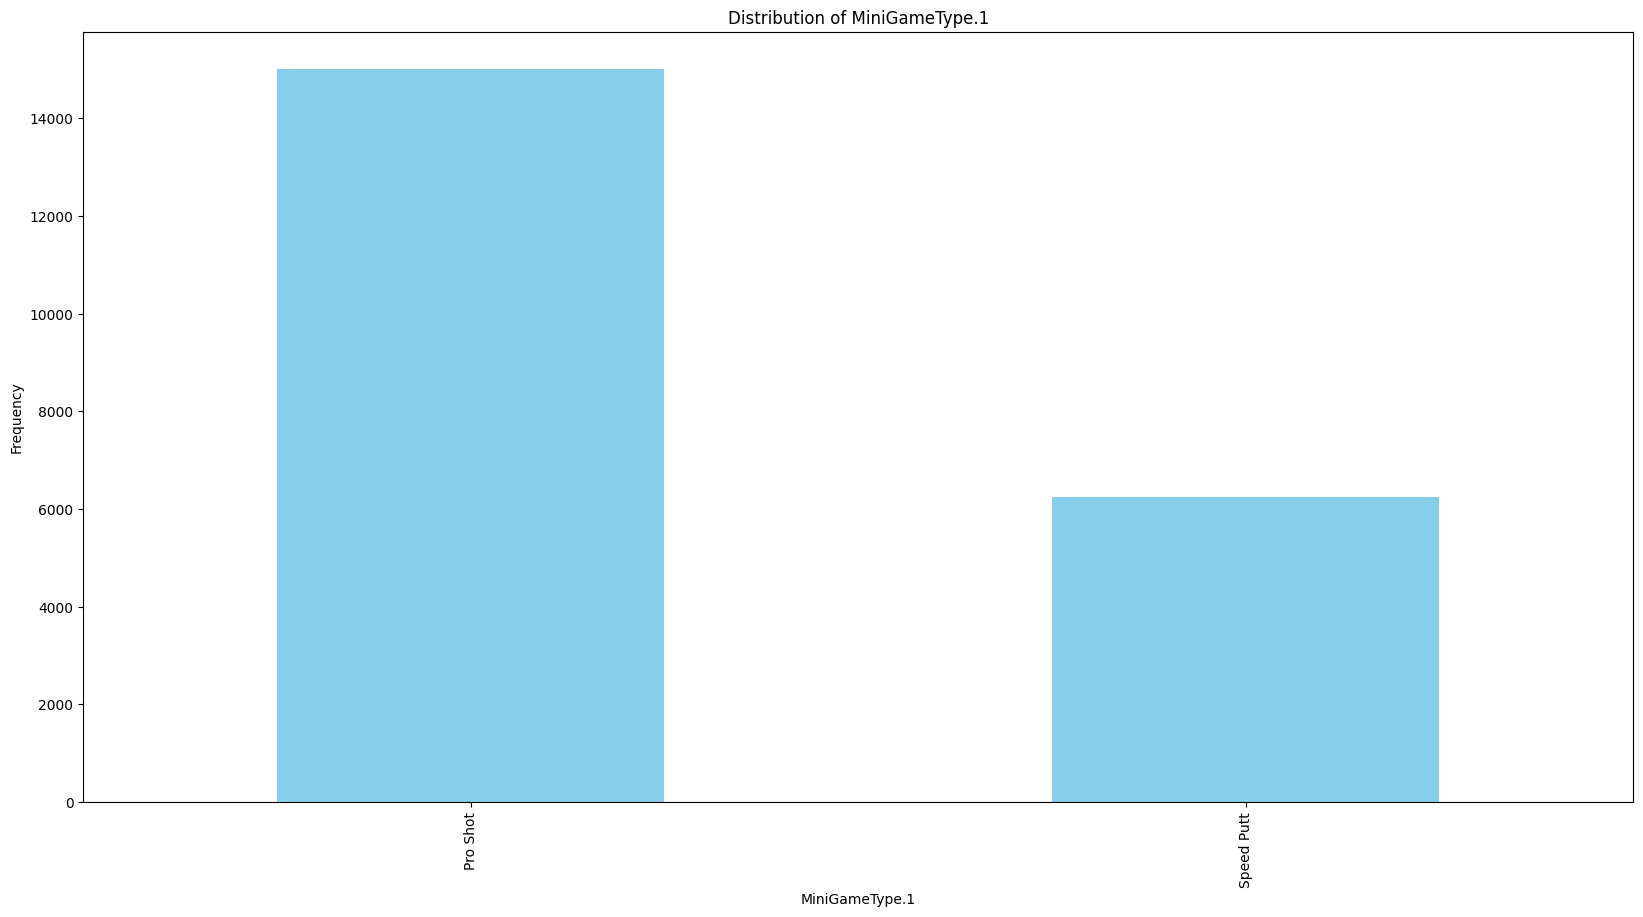


Value Counts for Offer ID:
Rewarded Ads                            19992
2328009d-ec16-454c-a318-dbfd66bb9446      679
4928d791-bd01-480c-8002-e8c67ea7bbf6      182
d7d9ca5a-a544-4c53-af51-a4aa4ed60454      172
d86dceb0-d5cf-4ad0-bd44-320ca1cc642c       64
926a0409-9fa4-463b-9136-a60e88dfa81f       49
a117d872-07ed-4576-b139-759b722ceddb       43
d2eaae25-0e5b-4fb1-a885-a1d3dc43c309       40
67f40a29-dd45-4981-b202-a76dd4149e2c       12
4ffdb022-1552-4870-90c8-07dc0a741d55       12
fbdf7c3a-5cd2-4475-b5fd-ffc3bfcc2e73        9
53152296-9c1f-4f98-a482-6918d590fd37        8
Name: Offer ID, dtype: int64


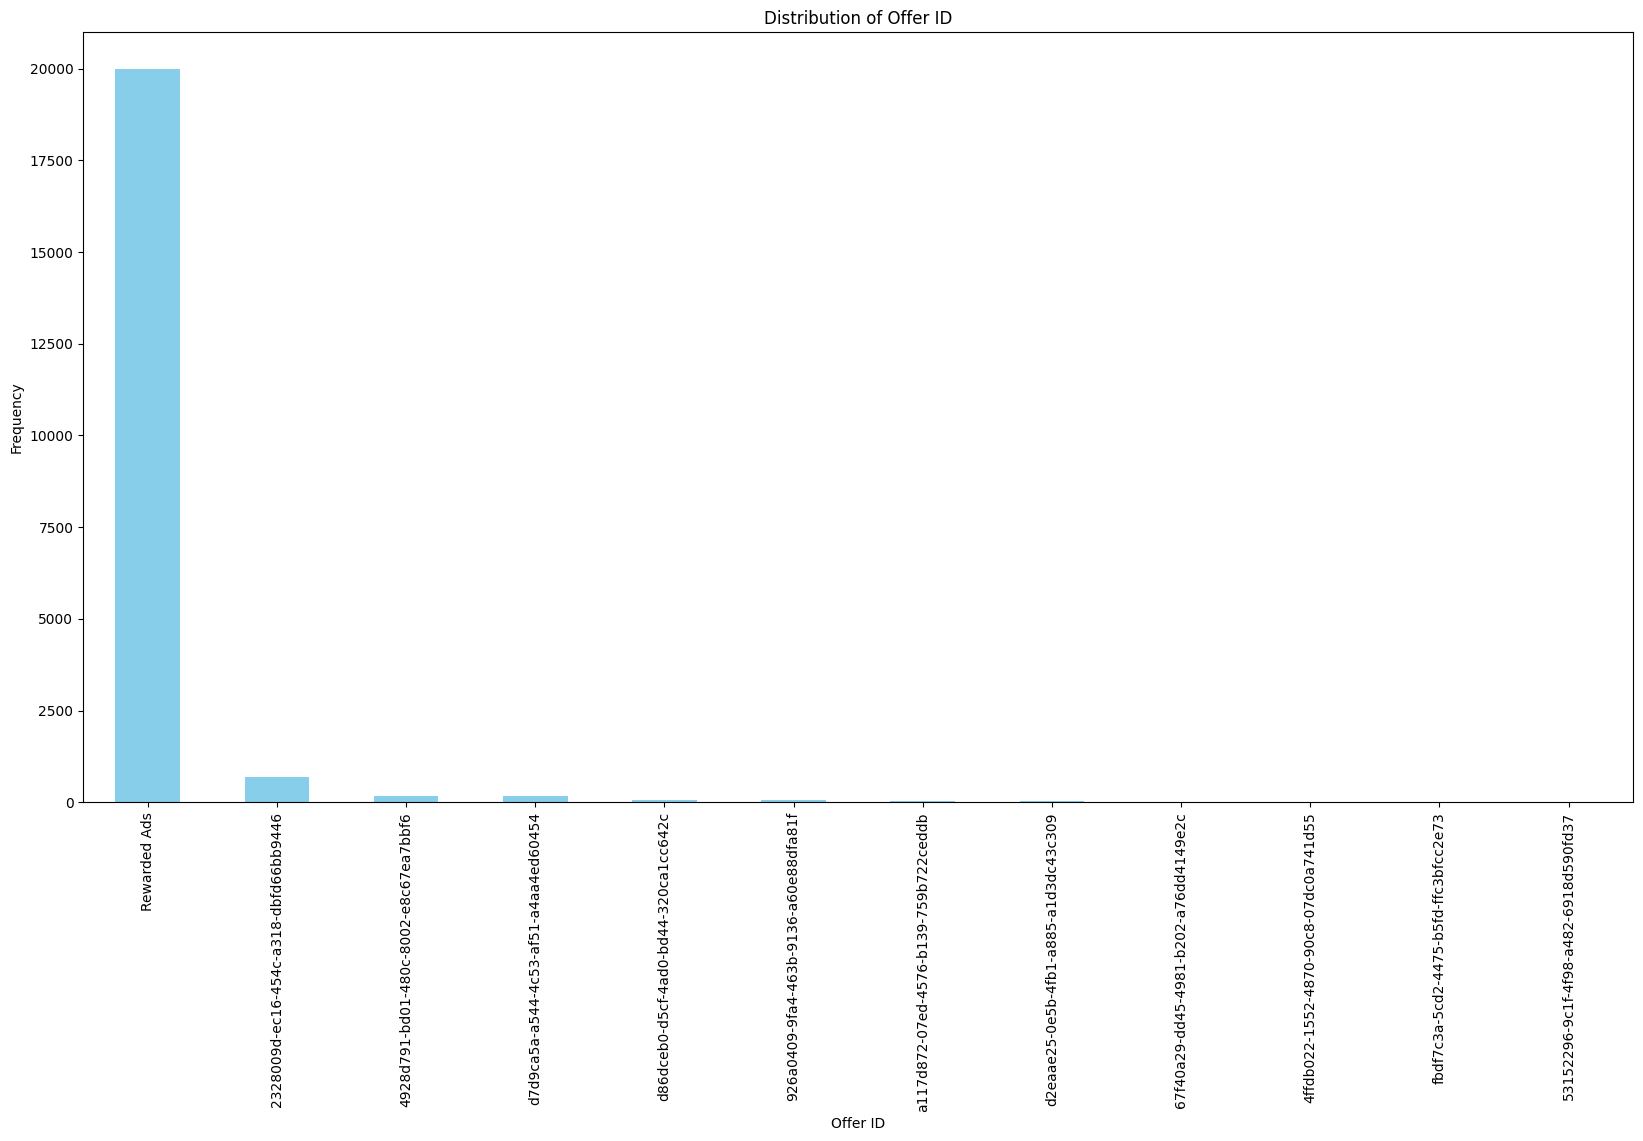


Value Counts for Type:
MiniGame Offer    20089
Wallet Offer        912
Starter Pack        261
Name: Type, dtype: int64


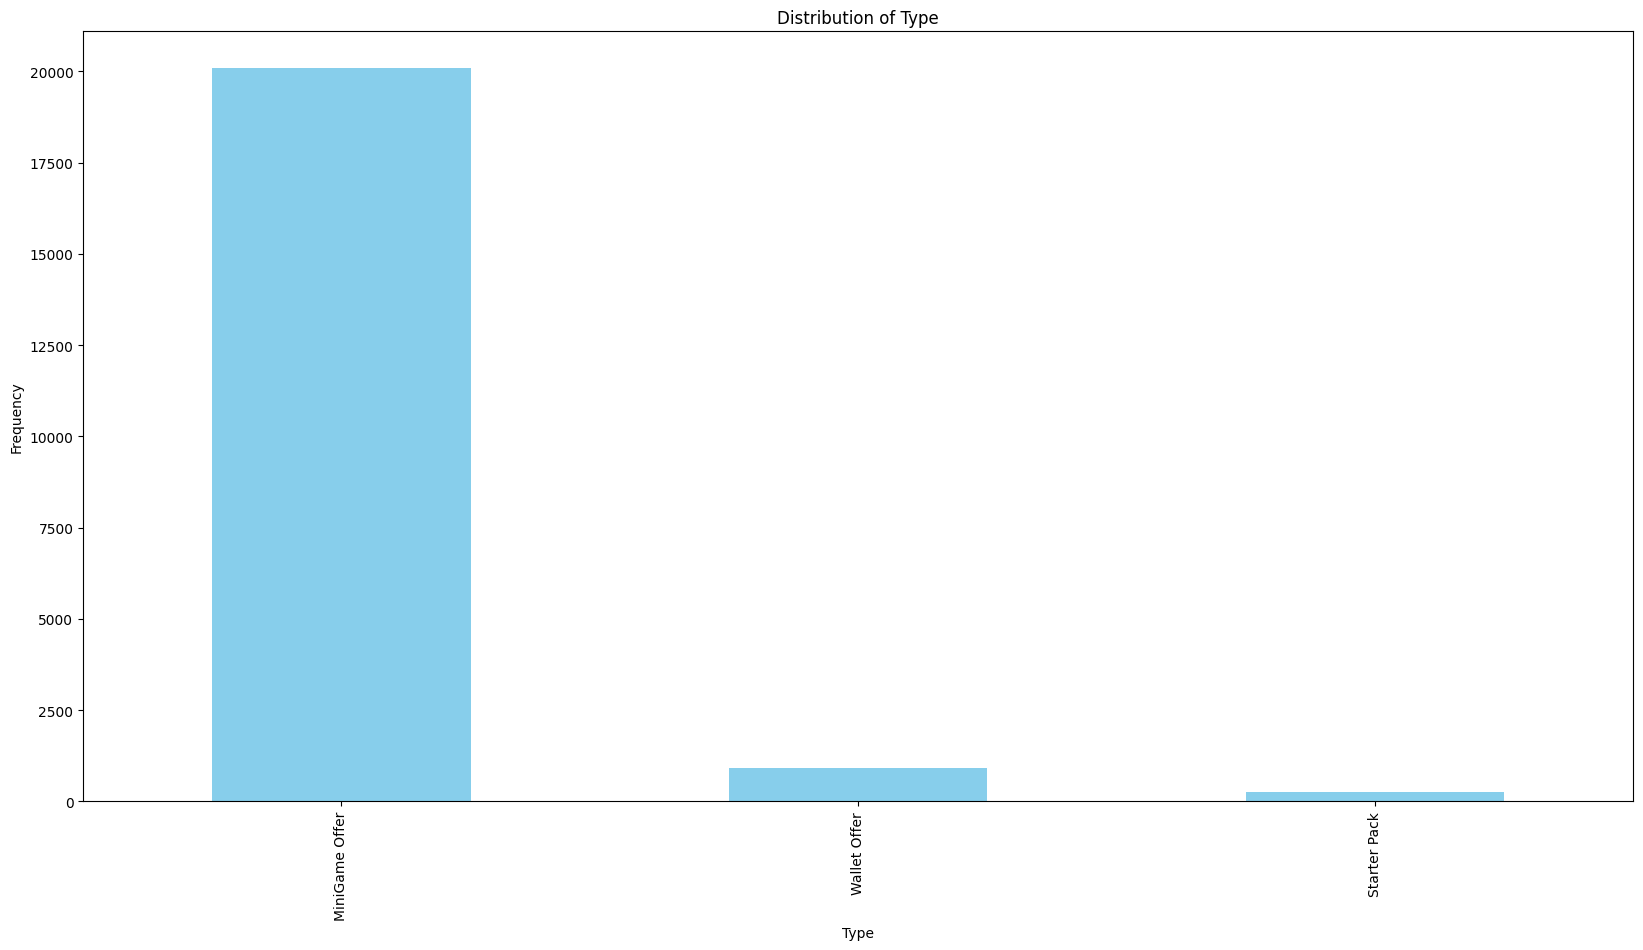


Value Counts for Offer Name:
ProShot Bundle 3      13770
SpeedPutt Bundle 3     6222
Wallet Bundle 1         679
Wallet Bundle 2         182
Pro Deal                172
ProShot Bundle 1         64
Starter Pack             49
Wallet Bundle 3          43
Growth Pack              40
ProShot Bundle 2         12
SpeedPutt Bundle 1       12
SpeedPutt Bundle 2        9
Wallet Bundle 4           8
Name: Offer Name, dtype: int64


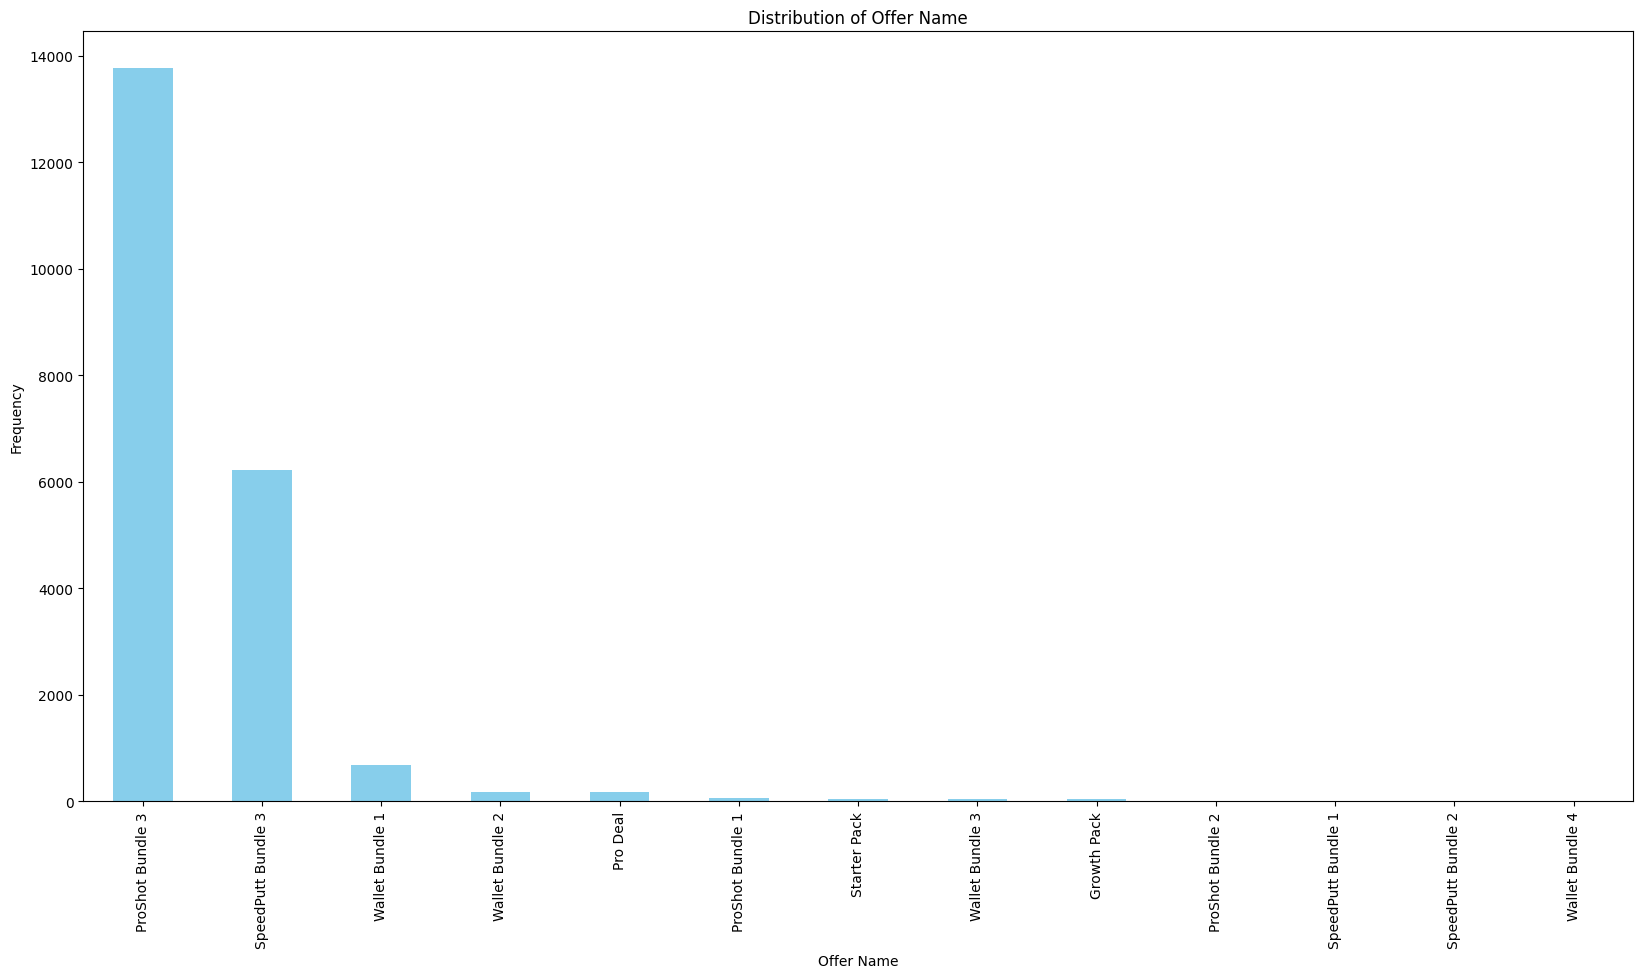


Value Counts for BadgeTypes:
5                          4825
5,5                        3367
5,5,5                      3181
5,5,5,5                    2218
5,5,5,5,5                  1489
5,5,5,5,5,5                1053
5,5,5,5,5,5,5,5             903
5,5,5,5,5,5,5               699
5,5,5,5,5,5,5,5,5,5,5       144
4                            84
5,5,5,3                      73
4,4,4,5,5                    68
4,3,4,5,5                    37
4,4,4,4,5                    37
5,4                          36
4,5,5                        35
5,5,5,5,5,5,5,3              33
5,4,5                        29
4,4,5                        27
5,5,5,5,5,5,5,5,5            24
5,5,3,4,3,5                  22
3,4,5,4,4,4,4,3              22
5,5,5,5,5,5,3                18
5,4,5,4,4,3,4                18
5,5,5,4                      17
3,3,3,3,3,1                  16
4,5,5,5                      16
5,4,4,5,5,4                  14
5,5,5,5,5,4,4,4              14
5,5,5,5,4,5                  10
4,5       

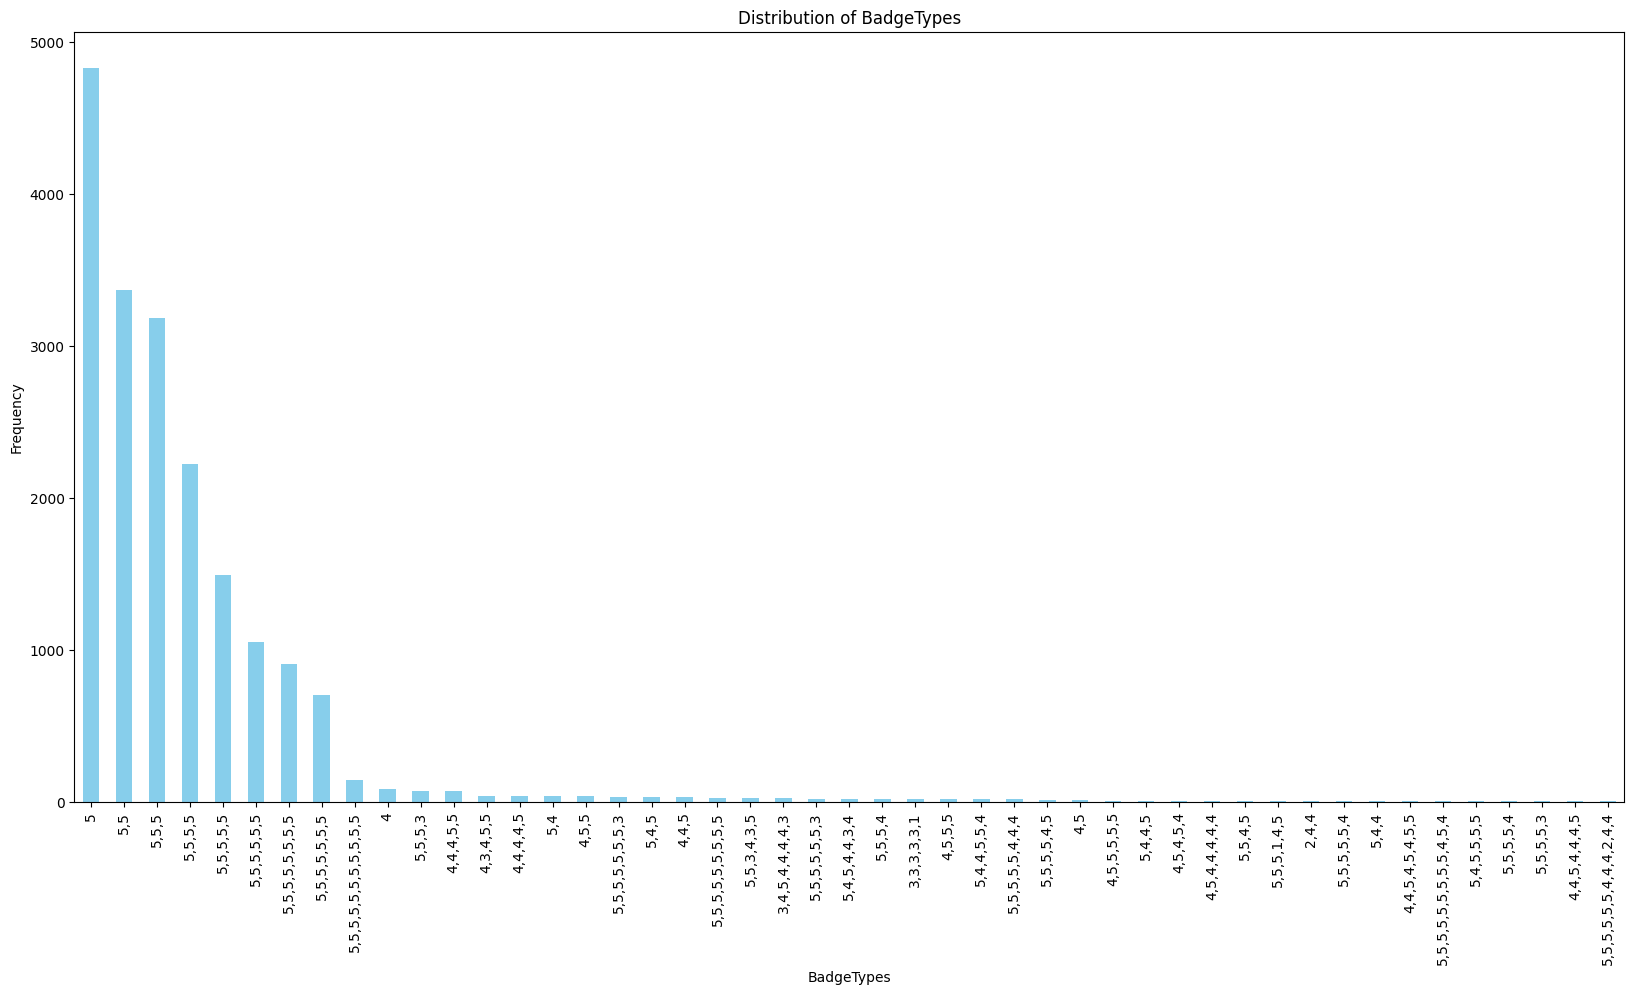


Value Counts for Seasons:
12                     3963
12,11                  2870
12,11,10               2851
12,11,10,9             1708
12,11,10,9,8           1262
                       ... 
11,7                      1
12,10,8,7,6,4,3,2,1       1
11,6                      1
12,8,7,6,5                1
9,8,7,6,5                 1
Name: Seasons, Length: 106, dtype: int64


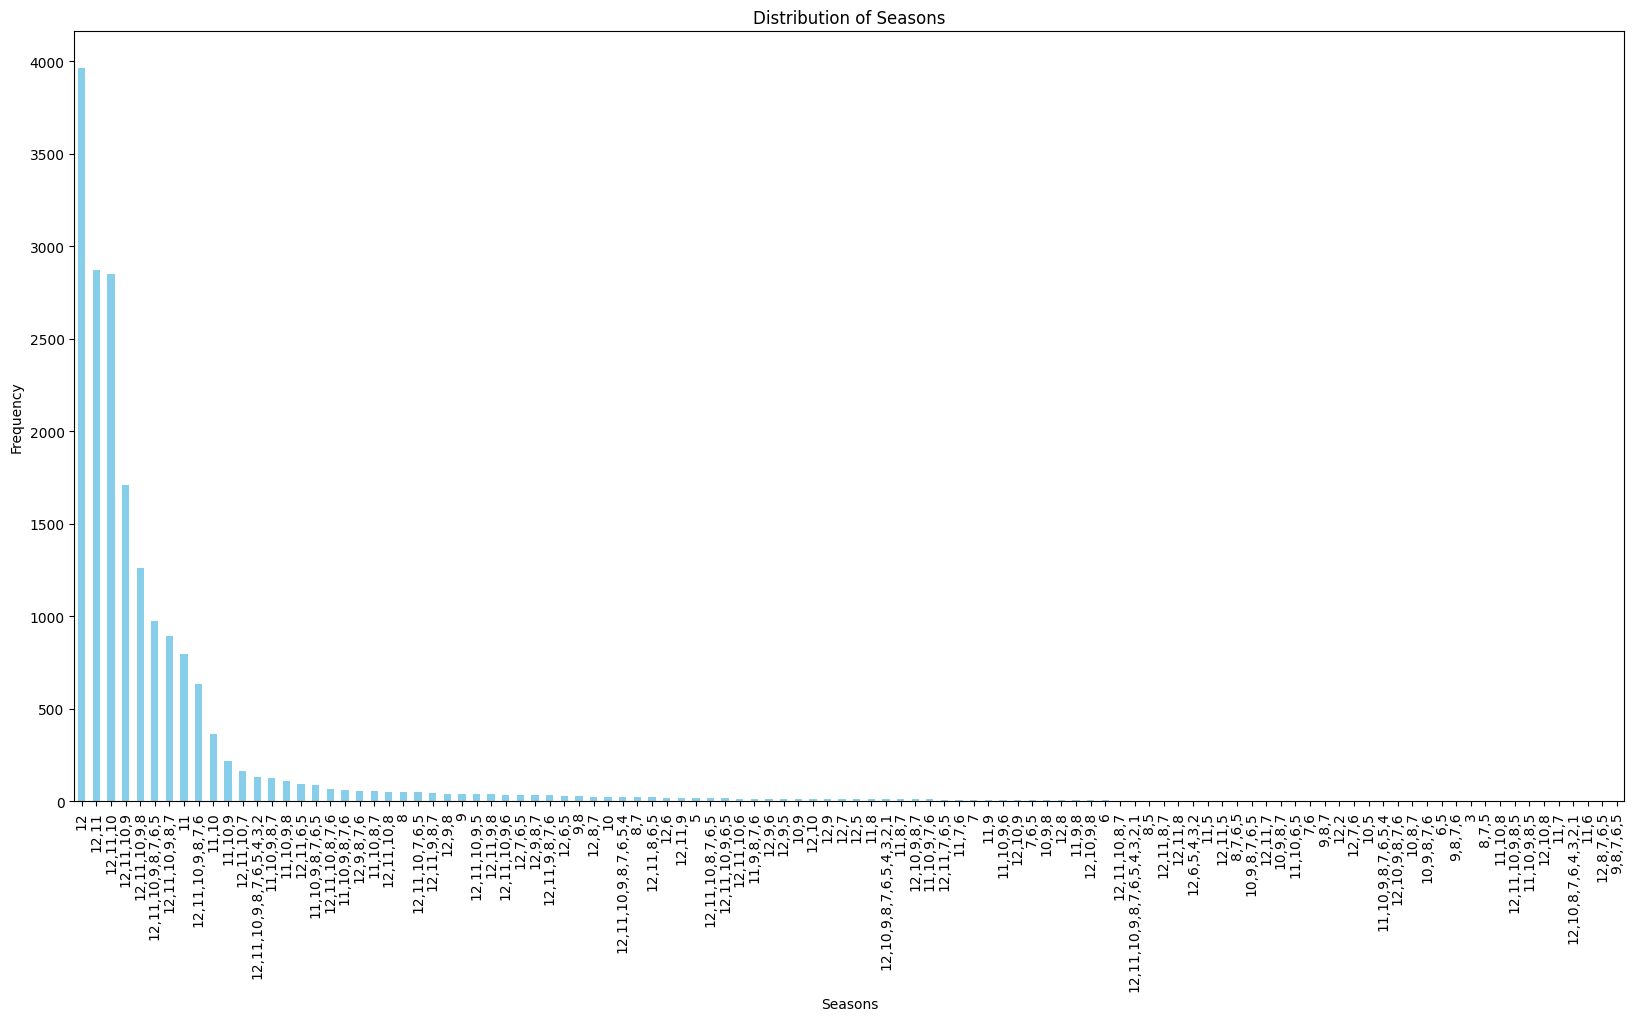

In [202]:
# Categorical Analysis
categorical_cols = df_final.select_dtypes(exclude=['number'])
for col in categorical_cols.columns:
    print(f"\nValue Counts for {col}:")
    print(df_final[col].value_counts())
    plt.figure(figsize=(20, 10))  # Adjust figure size
    df_final[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Correlation Matrix

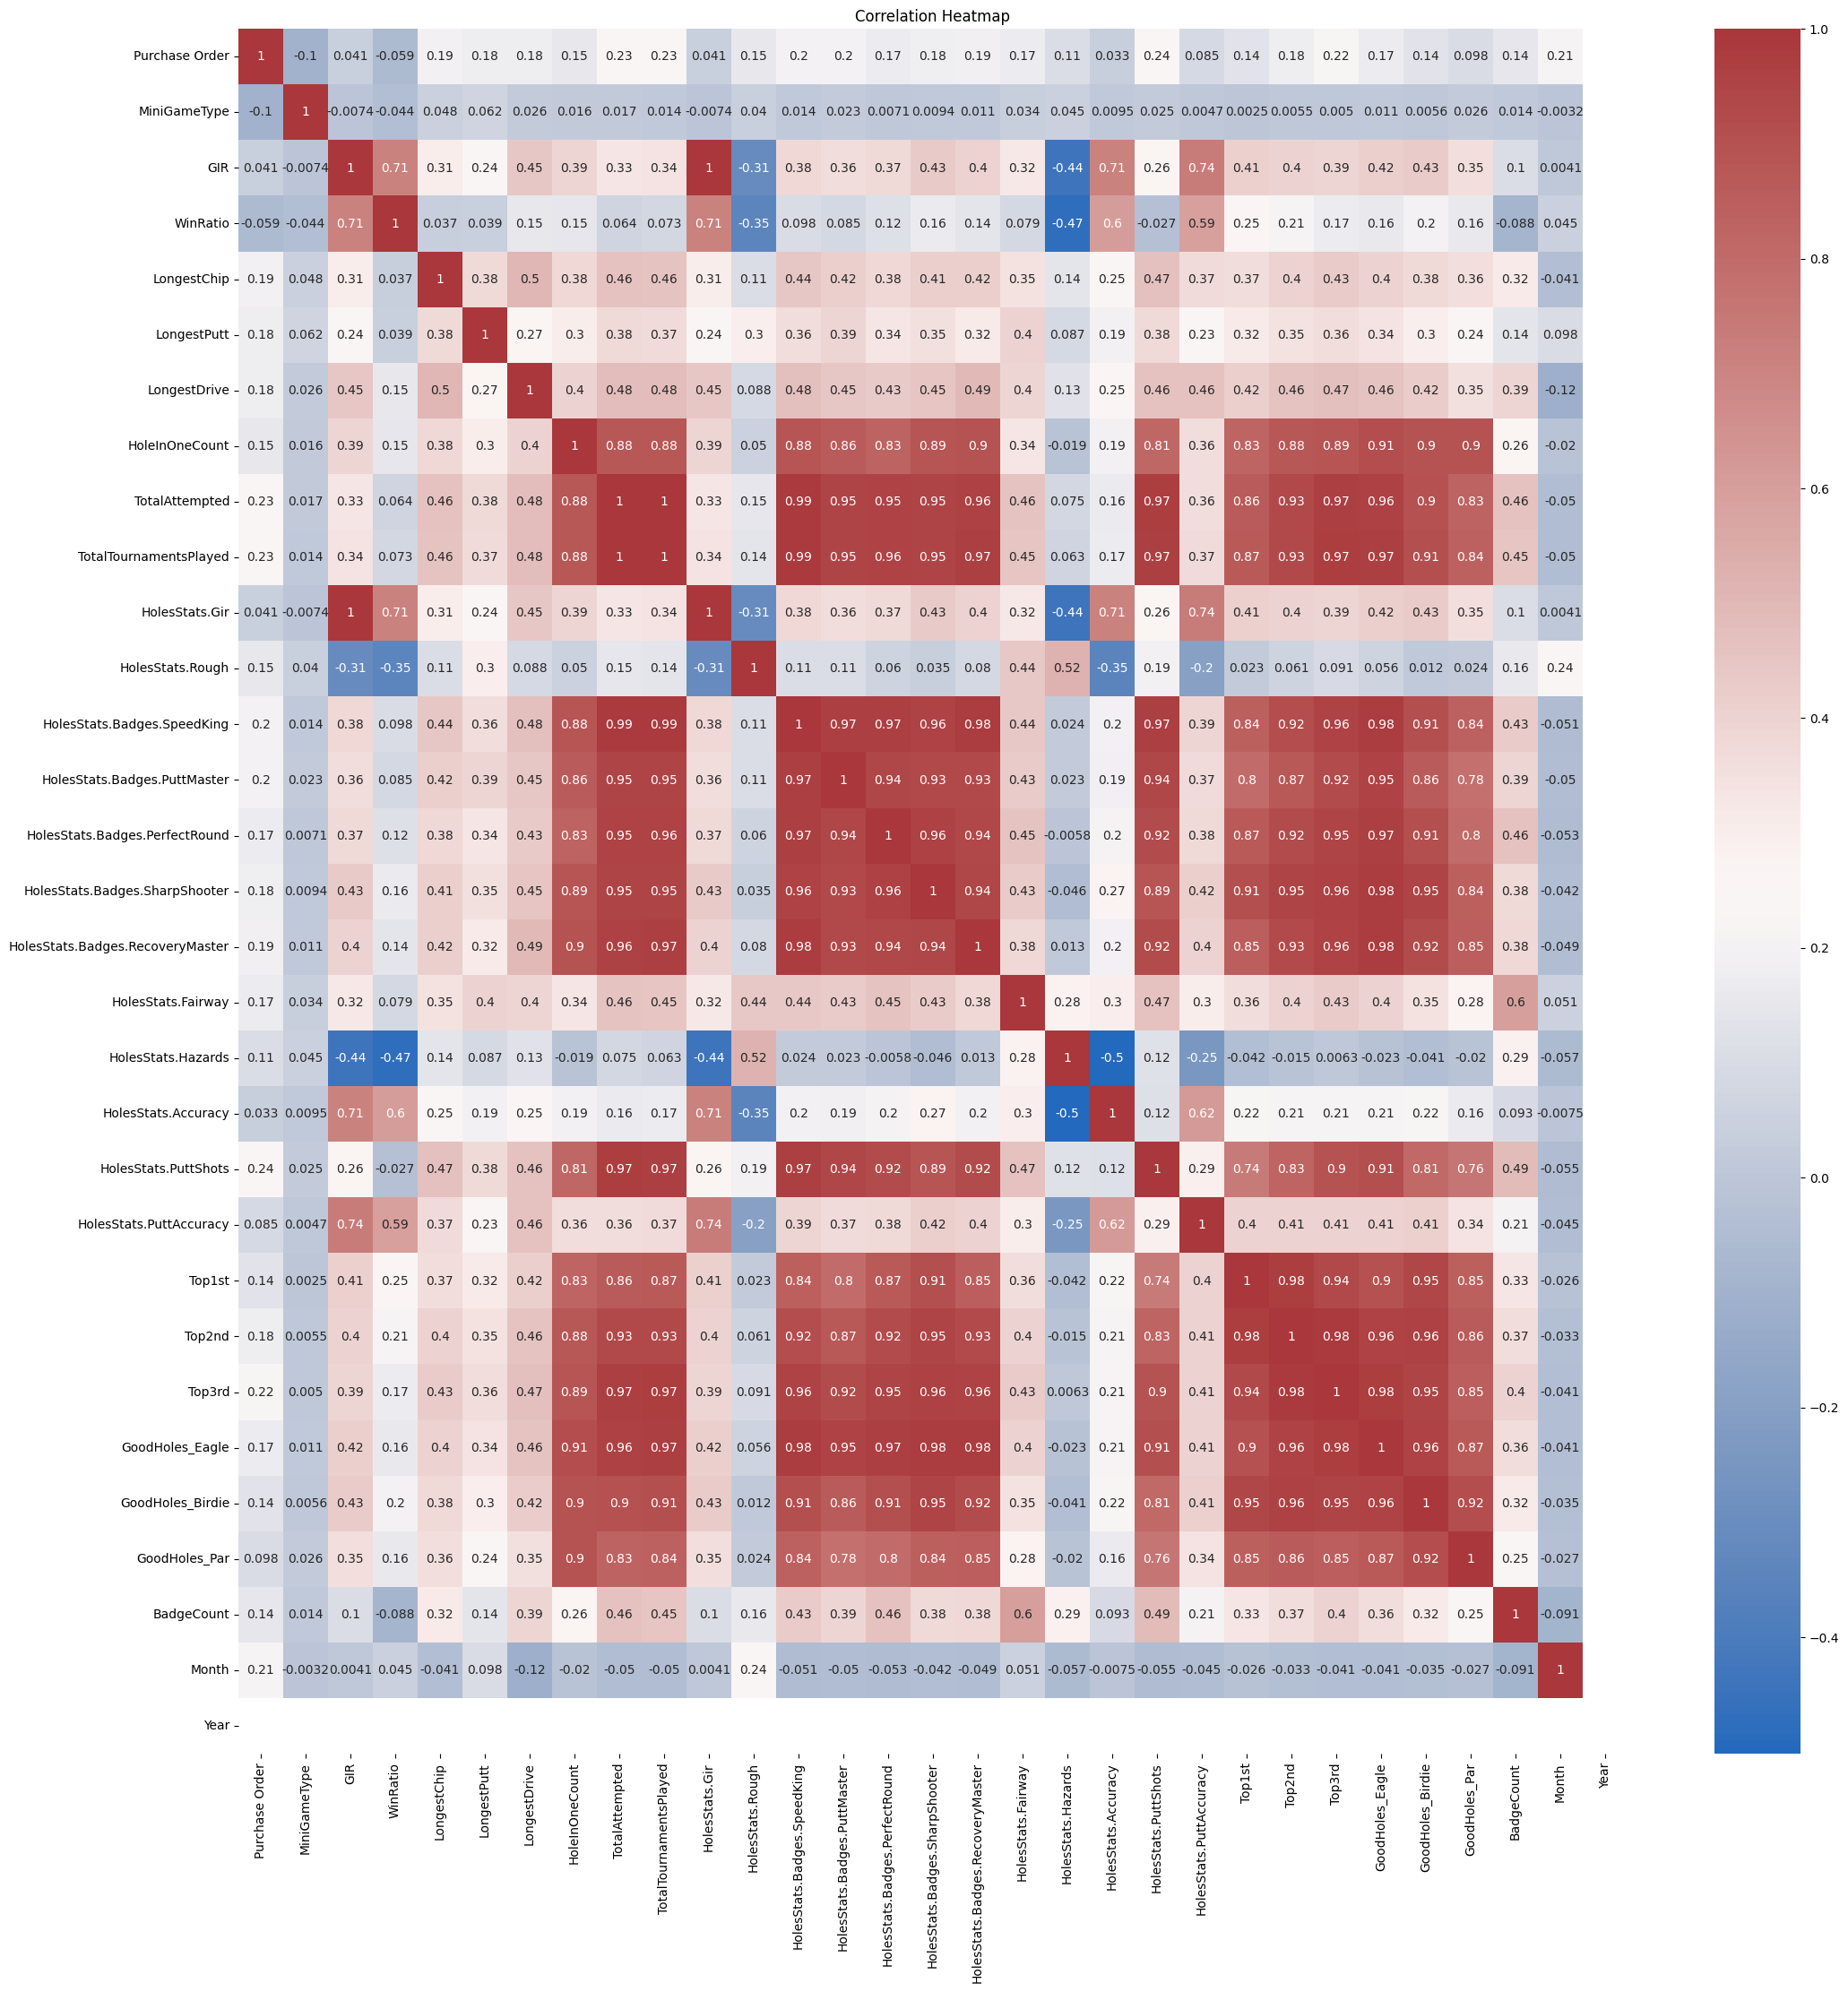

In [206]:
# correlation  between any two variables'coolwarm'
plt.figure(figsize=(25, 25))
sns.heatmap(df_final.corr(numeric_only=True), annot=True, cmap="vlag")
plt.title('Correlation Heatmap')
plt.show()

We can see that there is correlation among some variables; however, no single variable is correlated with Purchase order which is my variable of interest.

Bivariate Analysis
---

Relationship of different numerical variables with Purchase Order.

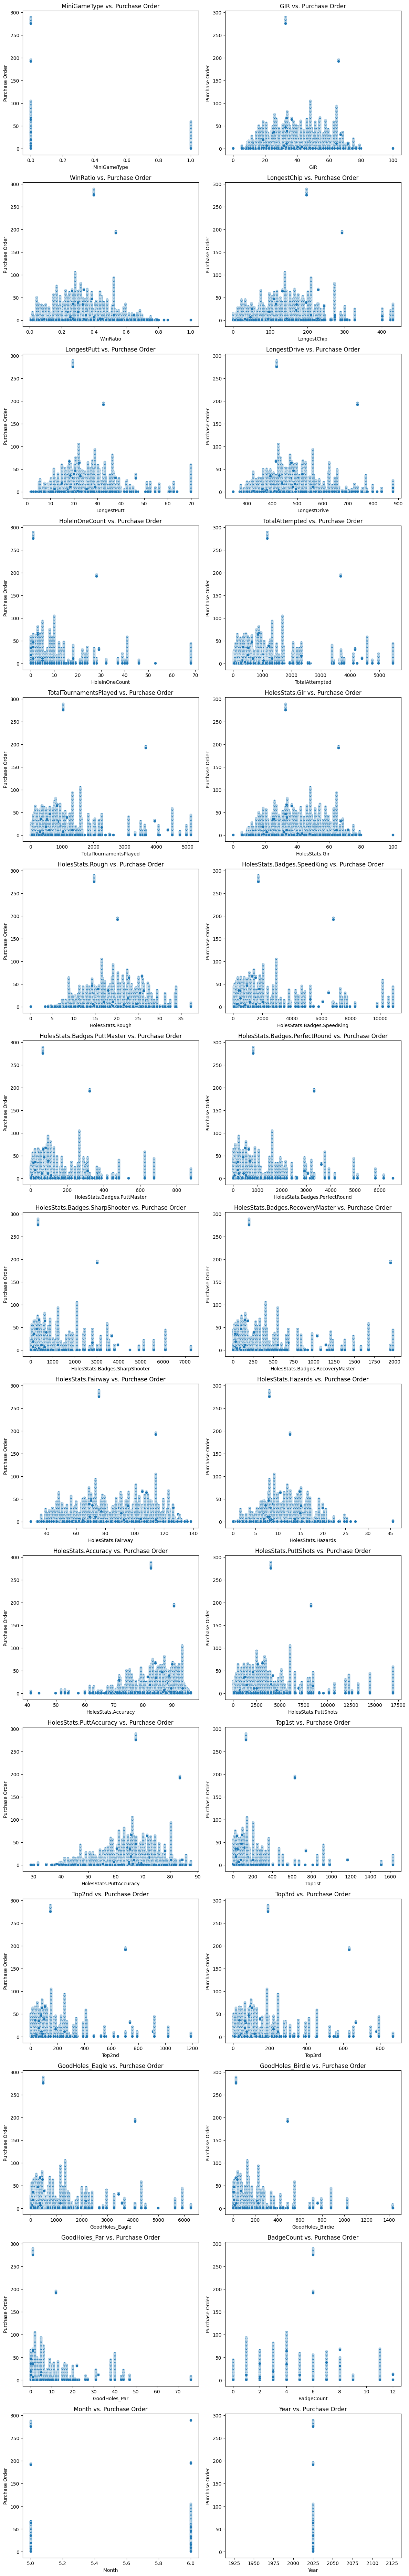

In [ ]:

numerical_cols = df_final.select_dtypes(include=['number']).columns
target_col = 'Purchase Order'

# Remove the target column if it exists in the numerical columns
numerical_cols = [col for col in numerical_cols if col != target_col]


n_cols = 2  
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.scatterplot(ax=axes[i], x=df_final[col], y=df_final[target_col])
    axes[i].set_title(f'{col} vs. {target_col}')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. We can see that there are more than 250+ purchase orders in mini game type 0 and has relatively more purchased orders than minigame type 1. Mini game type 1 has less than 100 purchase orders. There is clearly a difference in purchase orders patterns in both games. However, is this difference statistically significant or not that we will be testing in hypothesis testing section.

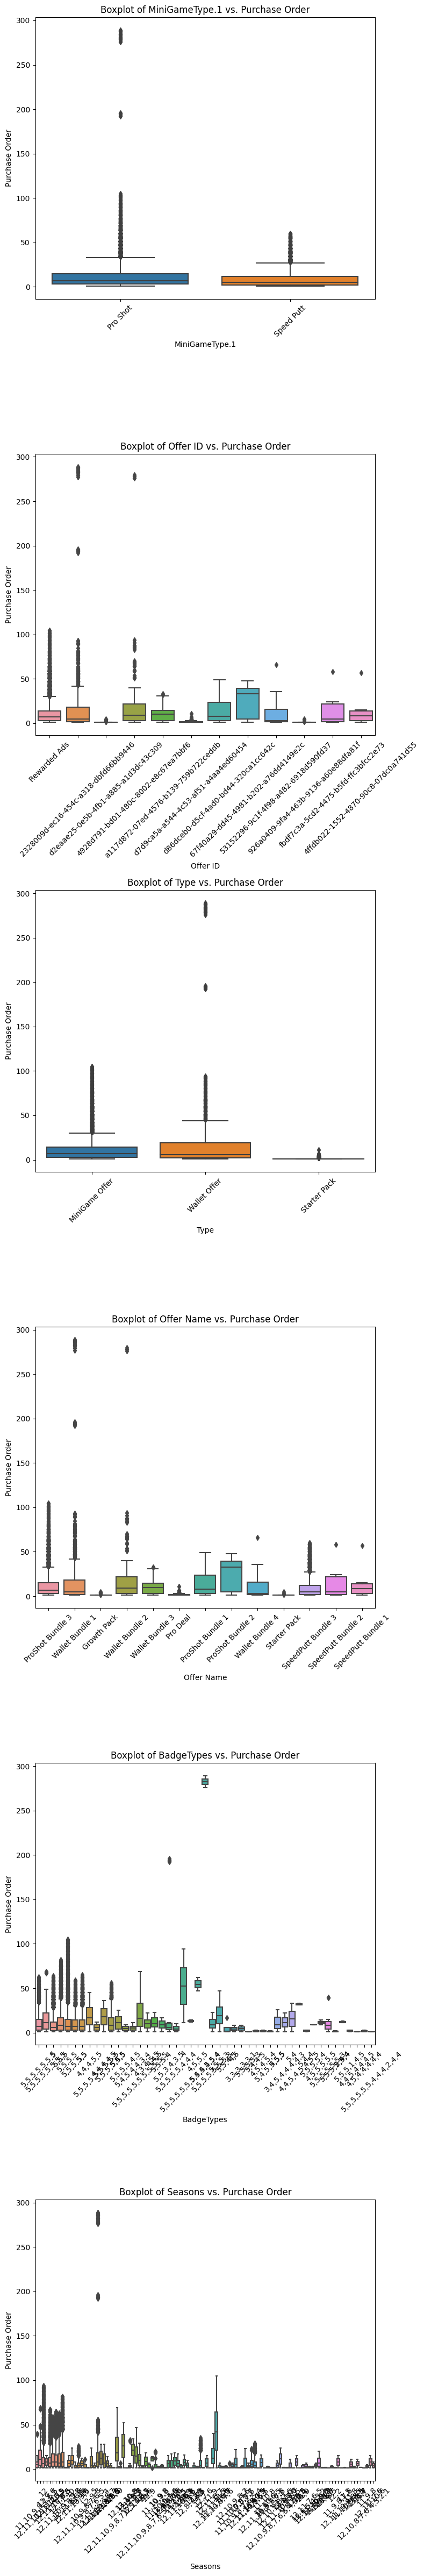

In [222]:
categorical_cols = df_final.select_dtypes(include=['object', 'category']).columns
target_col = 'Purchase Order'  

# Grid setup
n_cols = 1  
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 8 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.boxplot(ax=axes[i], x=df_final[col], y=df_final[target_col])
    axes[i].set_title(f'Boxplot of {col} vs. {target_col}')
    axes[i].tick_params(axis='x', rotation=45)

# Turn off any extra unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. ProShot Bundle 2 has the highest median value for purchase order. I will be testing it's difference (statistically) in hypothesis testing.
2. just by looking at the grapghs, it is hard to decide that which offer type has the highest median value for purchase order. Only it is evident that starter pack has the least median value for purchase order. We will be testing it's difference (statistically) in hypothesis testing as well. 


Hypothesis Testing
---

In [229]:
#Importing necessary libraries
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
import scikit_posthocs as sp


Purchase Order vs MiniGame Type

In [231]:
group_0 = df_final[df_final['MiniGameType'] == 0]['Purchase Order']
group_1 = df_final[df_final['MiniGameType'] == 1]['Purchase Order']

# Performing Mann-Whitney U Test (two-sided)
stat, p_value = mannwhitneyu(group_0, group_1, alternative='two-sided')

print("Mann-Whitney U statistic:", stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference.")
else:
    print("Fail to reject the null hypothesis. No statistically significant difference.")

Mann-Whitney U statistic: 53131123.5
P-value: 2.429769011400652e-53
Reject the null hypothesis. There is a statistically significant difference.


Purchase Order vs Offer

Kruskal-Wallis H-statistic: 773.9899781987768
P-value: 6.2400783898640476e-158
Reject the null hypothesis. At least one group differs significantly.

Dunn's Post-hoc Test Results:
              Group 1          Group 2       P-value  Reject Hypothesis
0         Growth Pack      Growth Pack  1.000000e+00              False
1            Pro Deal      Growth Pack  1.000000e+00              False
2    ProShot Bundle 1      Growth Pack  1.626813e-11               True
3    ProShot Bundle 2      Growth Pack  1.861887e-07               True
4    ProShot Bundle 3      Growth Pack  3.329058e-17               True
..                ...              ...           ...                ...
164      Starter Pack  Wallet Bundle 4  1.443202e-01              False
165   Wallet Bundle 1  Wallet Bundle 4  1.000000e+00              False
166   Wallet Bundle 2  Wallet Bundle 4  1.000000e+00              False
167   Wallet Bundle 3  Wallet Bundle 4  1.000000e+00              False
168   Wallet Bundle 4  Walle

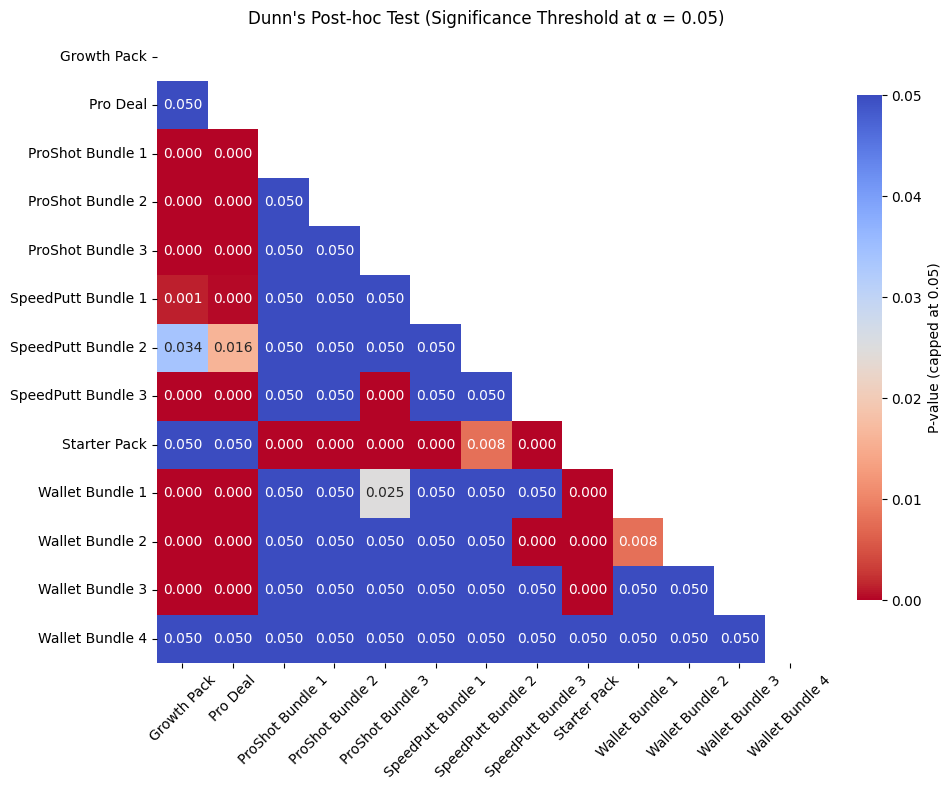

In [ ]:
groups = [group['Purchase Order'].values for name, group in df_final.groupby('Offer Name')]

# Perform Kruskal-Wallis H-test
stat, p_value = kruskal(*groups)

print("Kruskal-Wallis H-statistic:", stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. At least one group differs significantly.")

    # Post-hoc Dunn test
    dunn_result = sp.posthoc_dunn(df_final, val_col='Purchase Order', group_col='Offer Name', p_adjust='bonferroni')

    # Melting the result into long format for easier processing
    dunn_melted = dunn_result.reset_index().melt(id_vars='index', var_name='Group 2', value_name='P-value')
    dunn_melted.rename(columns={'index': 'Group 1'}, inplace=True)


    dunn_melted['Reject Hypothesis'] = dunn_melted['P-value'] < alpha

    print("\nDunn's Post-hoc Test Results:")
    print(dunn_melted)

    # Plotting significant pairs with heatmap
    capped_result = dunn_result.clip(upper=0.05)

    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(capped_result, dtype=bool))

    sns.heatmap(
        capped_result,
        annot=True,
        fmt=".3f",
        cmap="coolwarm_r",  
        mask=mask,
        cbar_kws={'label': 'P-value (capped at 0.05)', 'shrink': 0.8},
        vmin=0, vmax=0.05
    )

    plt.title("Dunn's Post-hoc Test (Significance Threshold at α = 0.05)")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


else:
    print("Fail to reject the null hypothesis. No significant difference among groups.")

There is statistically significant difference among offers which are not colored blue in the above figure.

Purchase Order vs Type of Offer

Kruskal-Wallis H-statistic: 460.28251290625377
P-value: 1.1244036950402227e-100
Reject the null hypothesis. At least one group differs significantly.

Dunn's Post-hoc Test Results:
          Group 1         Group 2        P-value  Reject Hypothesis
0  MiniGame Offer  MiniGame Offer   1.000000e+00              False
1    Starter Pack  MiniGame Offer  1.671578e-101               True
2    Wallet Offer  MiniGame Offer   1.000000e+00              False
3  MiniGame Offer    Starter Pack  1.671578e-101               True
4    Starter Pack    Starter Pack   1.000000e+00              False
5    Wallet Offer    Starter Pack   2.894339e-81               True
6  MiniGame Offer    Wallet Offer   1.000000e+00              False
7    Starter Pack    Wallet Offer   2.894339e-81               True
8    Wallet Offer    Wallet Offer   1.000000e+00              False


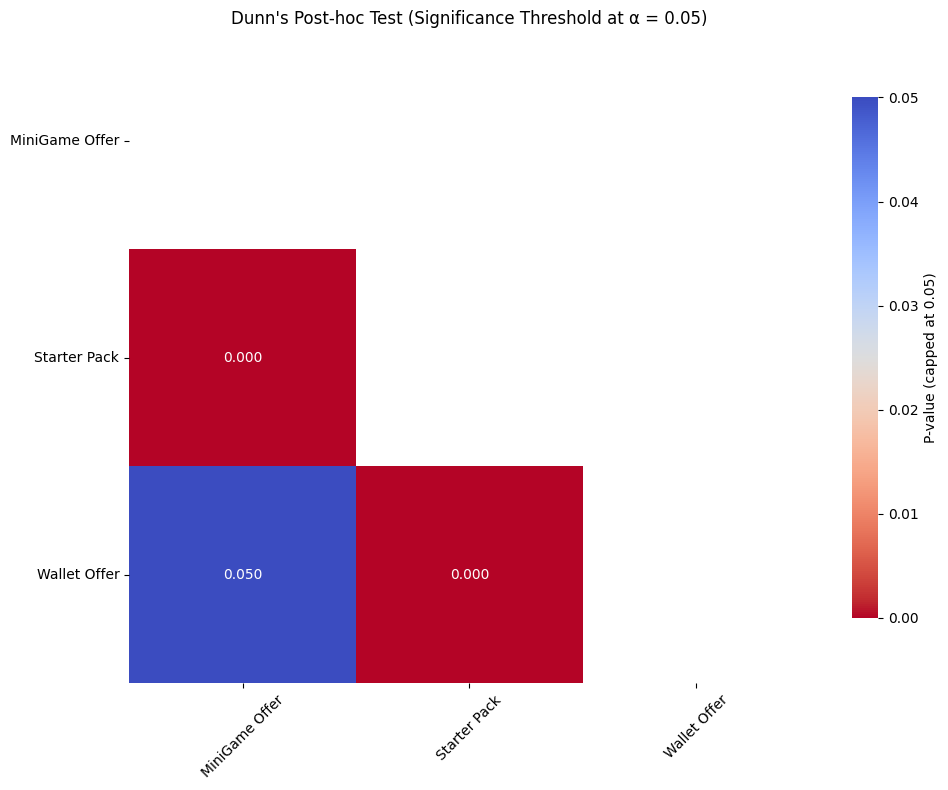

In [ ]:
groups = [group['Purchase Order'].values for name, group in df_final.groupby('Type')]

# Performing Kruskal-Wallis H-test
stat, p_value = kruskal(*groups)

print("Kruskal-Wallis H-statistic:", stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. At least one group differs significantly.")

    # Post-hoc Dunn test
    dunn_result = sp.posthoc_dunn(df_final, val_col='Purchase Order', group_col='Type', p_adjust='bonferroni')

    # Melting the result into long format for easier processing
    dunn_melted = dunn_result.reset_index().melt(id_vars='index', var_name='Group 2', value_name='P-value')
    dunn_melted.rename(columns={'index': 'Group 1'}, inplace=True)


    dunn_melted['Reject Hypothesis'] = dunn_melted['P-value'] < alpha

    print("\nDunn's Post-hoc Test Results:")
    print(dunn_melted)

    # Plotting significant pairs with heatmap
    capped_result = dunn_result.clip(upper=0.05)

    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(capped_result, dtype=bool))

    sns.heatmap(
        capped_result,
        annot=True,
        fmt=".3f",
        cmap="coolwarm_r", 
        mask=mask,
        cbar_kws={'label': 'P-value (capped at 0.05)', 'shrink': 0.8},
        vmin=0, vmax=0.05
    )

    plt.title("Dunn's Post-hoc Test (Significance Threshold at α = 0.05)")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


else:
    print("Fail to reject the null hypothesis. No significant difference among groups.")

There is statistically significant difference in purchase order among starter pack with both minigame offer and wallet offer. There is no statistically significant difference in between wallet offer and minigame offer.